# Lecture 3-5: Spatial Filters

## 0.- Initialize filesystem and libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pydicom
from IPython.display import Image, display

## 1.- Introduction to Spatial Filtering

**Spatial filters** are used in image processing to **enhance image quality** and highlight some aspects of the image.

Contrary to point processing techniques, which are based on mathematical transformations of the value of each pixel independently of the others, **spatial filters manipulate the pixel values based on the intensities of their neighboring pixels**.

Spatial filters are mainly used for **image restoration** and **edge detection**:

* **Image restoration**:
  
  * **Noise reduction**: minimizing random variations in pixel intensity that can obscure important details and decrease the performance of further processing algorithms.

  * **Artifact elimination**: improving the quality of the image by reducing blurring or other types of artifacts.

* **Edge detection**: highlighting boundaries of structures to assist in identifying organs or abnormalities (as a previous step to segmentation).


### 1.1. Linear and Non-linear Filters

Spatial filters can be **categorized into** two types: **linear** and **non-linear** filters, depending on the mathematical function they apply (linear or non-linear).

A function $f$ is said to be **linear** if it satisfies the following condition:

$$f(x + y) = f(x) + f(y)$$

Otherwise, $f$ is non-linear. A linear filter extends the concept of a linear function on the principles of additivity and homogeneity. Let's consider two images, _image1_ and _image2_:

* **Additivity**: applying the same linear filter to both images individually and then adding the results will provide the same result than applying the linear filter to the sum of the two images at once.

$$\text{Filter}(image1 + image2) = \text{Filter}(image1) + \text{Filter}(image2)$$

* **Homogeneity**: scaling the pixel intensities of an image by a constant factor and then appling the linear filter will result in the same image than applying the filter first and then scaling the output.

$$\text{Filter}(c \cdot image) = c \cdot \text{Filter}(image)$$


Depending on the type of spatial filters, they are characterized by:

*	**Linear filters:** apply a linear combination of pixel values within a neighborhood. Include filters like _Mean_ (_averaging_), _Gaussian_, and _Laplacian_ filters.

*	**Non-Linear filters:** apply non-linear operations on pixel values within a neighborhood. Include filters like _Median_, _Min/Max_, _Sobel_, _Prewitt_, and _Bilateral_ filters.





### 1.2. Application of Spatial Filters in Medical Imaging

A **general guide** of the application of spatial filters could be:

*	**Noise reduction:**
	* **Mean filter:** reduces random noise by averaging pixel values.
	* **Gaussian filter:** smooths images with a weighted average, reducing noise while preserving edges.

*	**Detail preservation:**
	* **Median filter:** removes impulse noise while preserving edges.
	* **Bilateral filter:** smooths images while maintaining sharp edges.
	* **Edge enhancement filters:** used for deblurring images and restore details.

*	**Edge detection:**
	* **Laplacian filter:** highlights regions of rapid intensity change, making it easier to identify structures and boundaries.
	* **Sobel filter:** detects edges in specific directions.

*	**Morphological operations:**
	* **Min/max filters:** used in binary images for operations like erosion and dilation. They are important transformations for artifact removal, shape analysis, and segmentation tasks.

## 2.- Image Quality and Signal-to-Noise Ratio


Quality of medical images can be **degraded** by two factors: **artifacts** and **noise**.

### 2.1. Artifacts

Artifacts are **structures** present in an image **that do not correspond to the actual anatomy or physiology** of the body.

They are usually **introduced during the image acquisition process**, caused by patient movement, equipment malfunction, incorrect settings, or external interference.

Artifacts usually appear as **streaks, rings, blurs, or distortions** in the image.

Each type of medical imaging has its own typical artefacts:

* **Radiography**: metal or motion artifacts, noise.
*	**CT**: ring, motion or metal artifacts.
*	**MRI**: motion or aliasing artifacts, noise.
*	**Ultrasound**: shadowing, noise, reverberation artifacts.

### 2.2. Noise

**Stochastic signals** are those whose behavior **cannot be predicted** exactly because they contain a component of **randomness or uncertainty**. They cannot be fully described by a fixed mathematical formula, and instead, they are characterized by **statistical properties**, such as the mean or variance.

**Noise** describe stochastic signals which are **not related to image content or the anatomy**, being the amplitude of the noise independent of the usable signal.

They are usually **related to** the physical processes of the **image acquisition**.



#### **Signal-to-noise ratio**

The noise becomes more visible when the imaging signal is of small amplitude. The **signal to noise ratio** (SNR) is a measure that **quantifies the quality** of an image in the presence of noise:

$$\text{SNR} = \frac{\mu_{\text{signal}}}{\sigma_{\text{noise}}}$$

where:

*	$\mu_{\text{signal}}$ is the mean (average) pixel intensity of the signal,
*	$\sigma_{\text{noise}}$ is the standard deviation of the noise.

The SNR is often expressed in decibels (dB) as:

$$\text{SNR}({\text{dB}}) = 20 \log_{10}\left(\frac{\mu_{\text{signal}}}{\sigma_{\text{noise}}}\right)$$

To measure the standard deviation of the noise, first **the noise component must be isolated**, which can be complicated.

A practical way to compute the SNR is to **estimate both statistical parameters**:

* **mean** of the signal ($\mu_{\text{signal}}$): can be calculated by taking the average pixel intensity of the entire image. This **assumes** that the **image predominantly consists of the signal** with a relatively small amount of noise.

* **standard deviation** of the noise ($\sigma_{\text{noise}}$): can be approximated by **subtracting a denoised version** of the image (which ideally contains only the signal) from the original image. The standard deviation of the resulting difference will provide an estimation of the noise level.






In [ ]:
# Load the original and the denoised images in grayscale
image = cv2.imread('/content/drive/MyDrive/PIM/Images/IM000004.jpg', cv2.IMREAD_GRAYSCALE)
denoised_image = cv2.imread('/content/drive/MyDrive/PIM/Images/IM000004_denoised.jpg', cv2.IMREAD_GRAYSCALE)

# Convert the images to float32 for proper arithmetic operations
image_float = np.float32(image)
denoised_image_float = np.float32(denoised_image)

# Calculate the mean of the signal (average pixel intensity)
mean_signal = np.mean(image_float)

# Calculate the noise by subtracting the denoised image from the original image
noise = image_float - denoised_image_float

# Calculate the standard deviation of the noise
std_noise = np.std(noise)

# Calculate the SNR
snr = mean_signal / std_noise
snr_db = 20 * np.log10(snr)

print(f'Mean of the signal: {mean_signal}')
print(f'Standard deviation of the noise: {std_noise}')
print(f'SNR: {snr}')
print(f'SNR (dB): {snr_db}')

Mean of the signal: 62.036659240722656
Standard deviation of the noise: 8.831597328186035
SNR: 7.024398326873779
SNR (dB): 16.93218231201172


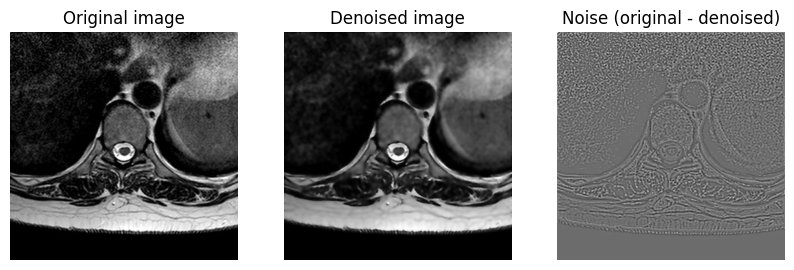

In [ ]:
# Plot the original image, the denoised image, and the noise (difference)
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Original image')
plt.axis('off')

# Denoised image
plt.subplot(1, 3, 2)
plt.imshow(denoised_image, cmap='gray', vmin=0, vmax=255)
plt.title('Denoised image')
plt.axis('off')

# Noise (original - denoised)
plt.subplot(1, 3, 3)
plt.imshow(noise, cmap='gray')
plt.title('Noise (original - denoised)')
plt.axis('off')

# Show the plots
plt.show()

#### **Types of noise**

* **Additive noise (Gaussian):**

  * appears as random variations in pixel values with a **normal distribution**
  * caused by random **variations in the electrical signals** of image acquisition systems

* **Impulse noise (salt-and-pepper):**

  * appears as random occurrences of **pixels with very low and high intensities** surrounded by pixels of the opposite intensities (_salt and pepper_)
  * can be caused by errors during **image acquisition or transmission**, such as bit errors in digital communication

* **Multiplicative noise (speckle):**

  * usually appears in **ultrasound** images
  * caused by random variations in the return signal from objects being imaged, due to **signal interference**
  * _multiplicative_ means that it **scales with the signal intensity**, so bright areas my appear more affected by speckle noise than dark areas
  * generates a **grainy pattern** that reduces the contrast and detail of the image

* **Quantum noise (Poisson):**

  * appears in images that are formed based on the **detection of photons**; the statistical variation in the number of detected photons leads to Poisson noise
  * it is common in low-light or **low-intensity conditions**, such as X-ray or CT imaging, when the dose is too low (and the number of photons is insufficient) to obtain a crisp image


As it happens with artifacts, **different types of noise are associated with** various medical imaging modalities [1] [2]:

*	**Radiography and CT:** quantum, Gaussian, and impulse noise
* **MRI:** Gaussian noise
*	**Ultrasound:** speckle and Gaussian noise
* **PET/SPECT:** Quantum and Gaussian noise

[1]: https://biomedpharmajournal.org/vol11no3/noise-issues-prevailing-in-various-types-of-medical-images/#:~:text=The%20various%20type%20noises%20affecting,Impulse%20Noise%20and%20Quantization%20noise.

[2]: https://ieeexplore.ieee.org/document/6346937

#### **Noise reduction techniques**

To reduce the impact of noise, various **noise reduction techniques** are used in image processing:

*	**Mean and Gaussian filtering:** reduces noise by averaging pixel values using a uniform or Gaussian kernel.
*	**Median filtering:** useful for removing salt-and-pepper noise while preserving edges.
*	**Wavelet denoising:** decomposes the image into different scales and filters out noise.
*	**Adaptive filtering:** filtering process based on local image characteristics.

## 3.- Cross-correlation, Convolution and Spatial Filtering


### 3.1. Convolution

**Cross-correlation** is a mathematical operation used to measure **similarity between a sliding mask and an image**. The sliding mask is formed by neighbors surrounding a central pixel at distance $d$.

It involves a small matrix of coefficients or weights, called **mask** or **kernel**, that **slides** over the image. At each position, it performs an **element-wise dot product**, summing the results to produce the final output for that position.

$$
\begin{array}{|c|c|c|c|c|c|c|}
\hline
4 & 7 & 1 & 9 & 2 & 6 & 6 \\ \hline
3 & 0 & 8 & 5 & 7 & 1 & 4 \\ \hline
2 & 9 & 3 & 8 & 4 & 5 & 0 \\ \hline
7 & 6 & 4 & 2 & 9 & 8 & 3 \\ \hline
5 & 2 & 7 & 1 & 0 & 9 & 8 \\ \hline
9 & 4 & 6 & 3 & 8 & 2 & 7 \\ \hline
1 & 8 & 5 & 7 & 6 & 0 & 9 \\ \hline
\end{array}
\quad \quad
\begin{array}{|c|c|c|}
\hline
2 &  1 &  0 \\ \hline
1 &  0 & -1  \\ \hline
0 & -1 & -2  \\ \hline
\end{array}
$$
<p align="center">Figure 3: Example of image (left) and kernel (right).</p>



**Convolution** is similar to cross-correlation in the sense that both perform an element-wise dot product between a mask and an image.

However, the **kernel** used in **convolution** is **flipped** both horizontally and vertically (or **180º rotated**) with respect to the cross-correlation kernel.

This provides convolution with the **commutativity property**, $f \ast g = g \ast f$, which is very useful for image processing (the $\ast$ **operator** denotes convolution).

$$
\begin{array}{|c|c|c|}
\hline
2 &  1 &  0 \\ \hline
1 &  0 & -1  \\ \hline
0 & -1 & -2  \\ \hline
\end{array}
\quad \Rightarrow \quad
\begin{array}{|c|c|c|}
\hline
0 & -1 & -2 \\ \hline
1 &  0 & -1  \\ \hline
2 &  1 &  0  \\ \hline
\end{array}
\quad \Rightarrow \quad
\begin{array}{|c|c|c|}
\hline
-2 & -1 &  0 \\ \hline
-1 &  0 &  1  \\ \hline
 0 &  1 &  2  \\ \hline
\end{array}
$$
<p align="center">Figure 4: Example of cross-correlation kernel (left) and its transformation for convolution (right) masks.</p>



In image processing, the terms cross-correlation, convolution and image (spatial) filtering are often **used interchangeably**.

Each image processing spatial filter is designed for a specific purpose, either to eliminate a type of noise or to enhance certain aspects of the image.

A filter, or mask, or **convolution kernel** is typically a **two-dimensional square window that moves across the image, affecting one pixel at a time**.

Each number in the filter is called a **kernel coefficient**, which determines the filter's effect and the resulting output image.



Consider a 3x3 kernel, $w$, as shown below:

$$
\begin{array}{|c|c|c|}
\hline
w(-1,-1) & w(-1,0) & w(-1,+1) \\
\hline
w(0,-1) & w(0,0) & w(0,+1) \\
\hline
w(+1,-1) & w(+1,0) & w(+1,+1) \\
\hline
\end{array}
$$
<p align="center">Figure 5: Elements of a 3-by-3 kernel.</p>


For a pixel at position  $(i, j)$  in the image  $I$, a sub-image of the same dimension as the filter is selected. The center of the filter is aligned with the pixel  $(i, j)$. The pixels in the sub-image are multiplied by the corresponding filter coefficients, resulting in a matrix of the same size as the filter. This matrix is then simplified using a mathematical equation to obtain a single value that replaces the pixel value at  $(i, j)$. The nature of the equation depends on the type of filter. For example, in a mean filter, each coefficient  $w(m,n)$  is  $1/N$, where  $N$  is the number of elements in the filter ($3\times 3=9$ in the example above).

$$
\begin{array}{|c|c|c|}
\hline
I(i-1,j-1) & I(i-1,j) & I(i-1,j+1) \\
\hline
I(i,j-1) & I(i,j) & I(i,j+1) \\
\hline
I(i+1,j-1) & I(i+1,j) & I(i+1,j+1) \\
\hline
\end{array}
$$
<p align="center">Figure 6: Elements of a 3-by-3 sub-image.</p>




The **filtered image** is produced by **sliding the filter over each pixel** in the image, calculating the single value, and **updating** the pixel in the original image.

This process of applying a filter over an image is known as **convolution in the spatial domain**:

$$ I_{\text{new}}(i,j) = w(-1,-1) \cdot I(i-1, j-1) + w(-1,0) \cdot I(i-1, j) + w(-1,1) \cdot I(i-1, j+1) +\ $$
$$\quad +\ w(0,-1) \cdot I(i, j-1) + w(0,0) \cdot I(i, j) + w(0,1) \cdot I(i, j+1) +\ $$
$$\quad +\ w(1,-1) \cdot I(i+1, j-1) + w(1,0) \cdot I(i+1, j) + w(1,1) \cdot I(i+1, j+1) $$

Expressing this in a more compact form, it yields:

$$ I_{\text{new}}(i,j) = \sum_{m=-1}^{1} \sum_{n=-1}^{1} w(m,n) \cdot I(i+m, j+n) $$

where:

* $I_{\text{new}}(i,j)$  denotes the new value of the pixel at position $(i,j)$ in the output image after applying the convolution operation,
* $w(m,n)$ represents the kernel coefficient at position $(m,n)$ within the 3-by-3 kernel,
* $I(i+m, j+n)$ is the pixel intensity of the image $I$ at position $(i+m, j+n)$,
* the outter sum $\sum_{m=-1}^{1}$ iterates over the rows of the kernel,
* the inner sum $\sum_{n=-1}^{1}$ iterates over the columns of the kernel,
* $\sum_{m=-1}^{1} \sum_{n=-1}^{1} w(m,n) \cdot I(i+m, j+n)$ represents the convolution operation applied to pixel $I(i,j)$.

When computing the convolution, this expression is **evaluated for each pixel** $I(i,j)$ in the image, where $i$ and $j$ range over all valid pixel coordinates.

In general, for a $(2a+1)\times(2b+1)$ filter, it can be expressed as
$$
I_{\text{new}}(x, y) = (w \ast I)(x, y) = \sum_{m=-a}^{a} \sum_{n=-b}^{b} w(m, n) \cdot I(x + m, y + n)
$$

<img src="https://tikz.net/janosh/conv2d.png" alt="Caption" width="600">
<p style="text-align: center;">Figure 7: Convolution between an image I and a kernel K. Source: <a href="https://tikz.net/conv2d/">TiKz.</a></p>

**Size of the output image**

If an **image** has size $N \times N$ and a **kernel** has size $n \times n$ (where $n < N$ and both $n$ and $N$ are odd), and the kernel is applied only when it **fits completely within the image**, the resulting image size will be smaller than $N \times N$.

In that case, the convolution **cannot be applied to the pixels near the borders** of the image where the kernel would extend outside.

Thus, a **margin** of $\frac{n-1}{2}$ pixels will be **discarded** from each side (top, bottom, left, and right) of the image.

So, the size of the resulting image will be **reduced** by twice the margin (once for each side of the image), and the **resulting size** will be:

$$\left(N - 2 \times \dfrac{n - 1}{2}\right) \times \left(N - 2 \times \dfrac{n - 1}{2}\right) = \left(N - (n - 1)\right) \times \left(N - (n - 1)\right)$$.

##### **Example of convolution:**



Image $I=$
$$
\begin{array}{|c|c|c|c|c|}
\hline
0 & 0 & 0 & 0 & 0 \\
\hline
0 & 9 & 8 & 7 & 0 \\
\hline
0 & 6 & 5 & 4 & 0 \\
\hline
0 & 3 & 2 & 1 & 0 \\
\hline
0 & 0 & 0 & 0 & 0 \\
\hline
\end{array}
$$

Kernel $w=$
$$
\begin{array}{|c|c|c|}
\hline
1 & 2 & 1 \\
\hline
2 & 4 & 2 \\
\hline
1 & 2 & 1 \\
\hline
\end{array}
$$

In this case, the size of the resulting image will be:

$$(5-(3-1)) \times (5-(3-1)) = 3 \times 3$$

* For the first element, $I_{\text{new}}(0,0)$, the kernel overlaps the submatrix
$$
\begin{array}{|c|c|c|}
\hline
0 & 0 & 0 \\
\hline
0 & 9 & 8 \\
\hline
0 & 6 & 5 \\
\hline
\end{array}
$$
so, the top-left element of the resulting $3\times 3$ matrix would be calculated as:
$$
I_{\text{new}}(0,0) = 9\times 4+8\times 2+6\times 2+5\times 1=69
$$

* For the center element, $I_{\text{new}}(1,1)$, the kernel overlaps the submatrix
$$
\begin{array}{|c|c|c|}
\hline
9 & 8 & 7 \\
\hline
6 & 5 & 4 \\
\hline
3 & 2 & 1 \\
\hline
\end{array}
$$
and the center element of the resulting $3\times 3$ matrix is now calculated as:
$$
I_{\text{new}}(1,1) = 9\times 1 + 8\times 2 + 7\times 1 + 6\times 2 + 5\times 4 + 4\times 2 + 3\times 1 + 2\times 2 + 1\times 1 = 80
$$

* The penultimate element, $I_{\text{new}}(2,1)$, results from the overlapping of the kernel with the submatrix
$$
\begin{array}{|c|c|c|}
\hline
6 & 7 & 4 \\
\hline
3 & 2 & 1 \\
\hline
0 & 0 & 0 \\
\hline
\end{array}
$$
which results in:
$$
I_{\text{new}}(2,1) = 6\times 1 + 5\times 2 + 4\times 1 + 3\times 2 + 2\times 4 + 1\times 2 = 36
$$

Finally, the convolution between the image and kernel results in the $3 \times 3$ matrix:

$$
I_{\text{new}} = w \ast I = \begin{array}{|c|c|c|}
\hline
69 & 84 & 57 \\
\hline
68 & 80 & 52 \\
\hline
33 & 36 & 21 \\
\hline
\end{array}
$$

In [ ]:
from scipy.signal import convolve2d

# Create the 5x5 matrix
image = np.array([
    [0, 0, 0, 0, 0],
    [0, 9, 8, 7, 0],
    [0, 6, 5, 4, 0],
    [0, 3, 2, 1, 0],
    [0, 0, 0, 0, 0],
])

# Define a kernel
kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

# Compute the convolution without padding
# mode 'valid' means that only positions where the entire kernel fits completely
# inside the image are considered for the convolution
convolved_image = convolve2d(image, kernel, mode='valid')

# Detailed calculations
# Element [0, 0] = 9*4 + 8*2 + 6*2 + 5*1 = 69
# Element [0, 1] = 9*2 + 8*4 + 7*2 + 6*1 + 5*2 + 4*1 = 84
# Element [0, 2] = 8*2 + 7*4 + 5*1 + 4*2 = 57

# Element [1, 0] = 9*2 + 8*1 + 6*4 + 5*2 + 3*2 + 2*1 = 68
# Element [1, 1] = 9*1 + 8*2 + 7*1 + 6*2 + 5*4 + 4*2 + 3*1 + 2*2 + 1*1 = 80
# Element [1, 2] = 8*1 + 7*2 + 5*2 + 4*4 + 2*1 + 1*2 = 52

# Element [2, 0] = 6*2 + 5*1 + 3*4 + 2*2 = 33
# Element [2, 1] = 6*1 + 5*2 + 4*1 + 3*2 + 2*4 + 1*2 = 36
# Element [2, 2] = 5*1 + 4*2 + 2*2 + 1*4 = 21

# Print the image, the kernel, and the convolved image
print("Image:\n", image)
print("Kernel:\n", kernel)
print("Convolved image:\n", convolved_image)

Image:
 [[0 0 0 0 0]
 [0 9 8 7 0]
 [0 6 5 4 0]
 [0 3 2 1 0]
 [0 0 0 0 0]]
Kernel:
 [[1 2 1]
 [2 4 2]
 [1 2 1]]
Convolved image:
 [[69 84 57]
 [68 80 52]
 [33 36 21]]


### 3.2. Padding

To **avoid reducing the size** of the convolved image, the convolution operation can be **applied to every pixel** in an image, **including those at the boundaries**, where parts of the filter extend beyond the image edges.

When the filter overlaps with boundary pixels, **new values need to be generated** before convolution can proceed. This process is known as **padding**.

Padding ensures that every pixel in the image receives the same treatment during convolution. Without padding, the resulting image reduces its size with respect to the original matrix.

The **padded pixels can be set to** zero, a constant value, or use pixel values from the image itself. They are **discarded** after convolution.


There are several padding options:

#### **Zero padding**

Padded pixels are set to **zero** (black pixels in a grayscale image). Zero padding involves **adding rows and columns of zeros** around the image boundary.

Zero padding ensures that the filter extends beyond the image edges **without introducing any additional values** that could affect the convolution process.

However, this method usually **darkens** the resulting image, as 0 values are treated as the lowest intensity (black).

OpenCV uses the following function:

    zero_padded_image = cv2.copyMakeBorder(matrix, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)

where `top`, `bottom`, `left`, and `right` are the padding size in every side of the array.

To remove padding, **array slicing** is applied:

    zero_padded_image_nopadded = zero_padded_image[top:-bottom, left:-right]

which maintains the rows and columns from the `(top + 1)th` to the `(M - bottom)th` row, and from the `(left + 1)th` to the `(N - right)th` column, where $M$ is the total number of rows in the padded image and $N$ is the total number of columns.

For example, in a $7 \times 7$ image, applying zero padding for a convolution with a $3 \times 5$ kernel extends the image to $(7 + 2 \times \frac{3-1}{2}) \times (7 + 2 \times \frac{5-1}{2}) = 9 \times 11$ image, by adding a border of zeros around it ($\frac{5-1}{2} = 2$ columns of zeros on the left and right, and $\frac{3-1}{2} = 1$ row of zeros up and down)

Thus, the original and padded images are:

$$
\begin{array}{|c|c|c|c|c|c|c|}
\hline
1 & 2 & 3 & 4 & 5 & 6 & 7 \\
\hline
8 & 9 & 10 & 11 & 12 & 13 & 14 \\
\hline
15 & 16 & 17 & 18 & 19 & 20 & 21 \\
\hline
22 & 23 & 24 & 25 & 26 & 27 & 28 \\
\hline
29 & 30 & 31 & 32 & 33 & 34 & 35 \\
\hline
36 & 37 & 38 & 39 & 40 & 41 & 42 \\
\hline
43 & 44 & 45 & 46 & 47 & 48 & 49 \\
\hline
\end{array}
$$
<p align="center">Figure 8: 7-by-7 example image.</p>

$$
\begin{array}{|c|c||c|c|c|c|c|c|c||c|c|}
\hline
\cdot 0 \cdot & \cdot 0 \cdot & \cdot 0 \cdot & \cdot 0 \cdot & \cdot 0 \cdot & 0 & 0 & 0 & 0 & 0 & 0 \\
\hline \hline
\cdot 0 \cdot & \cdot 0 \cdot & \cdot 1 \cdot & \cdot 2 \cdot & \cdot 3 \cdot & 4 & 5 & 6 & 7 & 0 & 0 \\
\hline
\cdot 0 \cdot & \cdot 0 \cdot & \cdot 8 \cdot & \cdot 9 \cdot & \cdot 10 \cdot & 11 & 12 & 13 & 14 & 0 & 0 \\
\hline
0 & 0 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 0 & 0 \\
\hline
0 & 0 & 22 & 23 & 24 & 25 & 26 & 27 & 28 & 0 & 0 \\
\hline
0 & 0 & 29 & 30 & 31 & 32 & 33 & 34 & 35 & 0 & 0 \\
\hline
0 & 0 & 36 & 37 & 38 & 39 & 40 & 41 & 42 & 0 & 0 \\
\hline
0 & 0 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 0 & 0 \\
\hline \hline
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\hline
\end{array}
$$
<p align="center">Figure 9: Padding with zeros. The dots denote the 3-by-5 kernel centered at the first element of the original image, 1.</p>


To recover the output image with the same size as the original one, the $9 \times 11$ resulting array is sliced from the 2nd to the 8th row and from the 3rd to the 9th column, which corresponds to:

    output_image = padded_image[1:8, 2:9] = padded_image[1:-1, 2:-2]

since array indices start at 0, and are inclusive at the beginning and exclusive at the end:

* `[1:-1]` slices from the 2nd row (index 1) to the 2nd row from the bottom (index -2)
*	`[2:-2]` slices from the 3rd column (index 2) to the 3rd column from the right (index -3).

In [ ]:
# Define the 7x7 matrix
matrix = np.array([
    [1, 2, 3, 4, 5, 6, 7],
    [8, 9, 10, 11, 12, 13, 14],
    [15, 16, 17, 18, 19, 20, 21],
    [22, 23, 24, 25, 26, 27, 28],
    [29, 30, 31, 32, 33, 34, 35],
    [36, 37, 38, 39, 40, 41, 42],
    [43, 44, 45, 46, 47, 48, 49]
], dtype=np.uint8)

# Parameters for padding
top, bottom, left, right = 1, 1, 2, 2  # Padding size

# Zero Padding (Constant Padding with value 0): add a zero-padding border around the matrix
# cv2.copyMakeBorder:
# - matrix: input image (or matrix) to be padded
# - top, bottom, left, right: the number of pixels to add to each side of the image
# - cv2.BORDER_CONSTANT: specifies the border type. BORDER_CONSTANT fills the border with a constant value
# - value=0: specifies the constant value used for padding (in this case, 0, which creates zero padding)
zero_padded_image = cv2.copyMakeBorder(matrix, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)

# Slice the padded image to recover a 7x7 image
zero_padded_image_nopadded = zero_padded_image[top:-bottom, left:-right]

# Print the padded and non-padded arrays
print(zero_padded_image)
print(zero_padded_image_nopadded)

[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  2  3  4  5  6  7  0  0]
 [ 0  0  8  9 10 11 12 13 14  0  0]
 [ 0  0 15 16 17 18 19 20 21  0  0]
 [ 0  0 22 23 24 25 26 27 28  0  0]
 [ 0  0 29 30 31 32 33 34 35  0  0]
 [ 0  0 36 37 38 39 40 41 42  0  0]
 [ 0  0 43 44 45 46 47 48 49  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]]
[[ 1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14]
 [15 16 17 18 19 20 21]
 [22 23 24 25 26 27 28]
 [29 30 31 32 33 34 35]
 [36 37 38 39 40 41 42]
 [43 44 45 46 47 48 49]]


#### **Constant padding**


This method assigns a specific **constant value** to all pixels **outside** the image boundaries. When a constant value (e.g., 10) is chosen for padding, all pixels outside the image boundaries would be set to that value.

This type of padding is used when **maintaining a specific background intensity or color** is important.

In OpenCV:

    constant_padded_image = cv2.copyMakeBorder(matrix, top, bottom, left, right, cv2.BORDER_CONSTANT, value=constant_value)

Example:

$$
\begin{array}{|c|c||c|c|c|c|c|c|c||c|c|}
\hline
10 & 10 & 10 & 10 & 10 & 10 & 10 & 10 & 10 & 10 & 10 \\
\hline \hline
10 & 10 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 10 & 10 \\
\hline
10 & 10 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 10 & 10 \\
\hline
10 & 10 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 10 & 10 \\
\hline
10 & 10 & 22 & 23 & 24 & 25 & 26 & 27 & 28 & 10 & 10 \\
\hline
10 & 10 & 29 & 30 & 31 & 32 & 33 & 34 & 35 & 10 & 10 \\
\hline
10 & 10 & 36 & 37 & 38 & 39 & 40 & 41 & 42 & 10 & 10 \\
\hline
10 & 10 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 10 & 10 \\
\hline \hline
10 & 10 & 10 & 10 & 10 & 10 & 10 & 10 & 10 & 10 & 10 \\
\hline
\end{array}
$$
<p align="center">Figure 10: Padding the image with constant value of 10.</p>

In [ ]:
# Value for constant padding
constant_value = 10

# Constant Padding (with any value)
constant_padded_image = cv2.copyMakeBorder(matrix, top, bottom, left, right, cv2.BORDER_CONSTANT, value=constant_value)

# Print the image with constant padding
print(constant_padded_image)

[[10 10 10 10 10 10 10 10 10 10 10]
 [10 10  1  2  3  4  5  6  7 10 10]
 [10 10  8  9 10 11 12 13 14 10 10]
 [10 10 15 16 17 18 19 20 21 10 10]
 [10 10 22 23 24 25 26 27 28 10 10]
 [10 10 29 30 31 32 33 34 35 10 10]
 [10 10 36 37 38 39 40 41 42 10 10]
 [10 10 43 44 45 46 47 48 49 10 10]
 [10 10 10 10 10 10 10 10 10 10 10]]


#### **Nearest neighbor padding**

Nearest neighbor padding **copies the value from the nearest edge pixel** to fill in the padded region.

For example, when the filter extends beyond the right edge of the image, the rightmost column would be **duplicated** to fill the padded area.

This medhod preserves the intensity or color of the closest pixels, which can be useful for **maintaining continuity in textures or structures** that extend beyond the image boundaries and **preserving sharpness**.

      nearest_padded_image = cv2.copyMakeBorder(matrix, top, bottom, left, right, cv2.BORDER_REPLICATE)

Example:

$$
\begin{array}{|c|c||c|c|c|c|c|c|c||c|c|}
\hline
1 & 1 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 7 & 7 \\
\hline \hline
1 & 1 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 7 & 7 \\
\hline
8 & 8 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 14 & 14 \\
\hline
15 & 15 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 21 & 21 \\
\hline
22 & 22 & 22 & 23 & 24 & 25 & 26 & 27 & 28 & 28 & 28 \\
\hline
29 & 29 & 29 & 30 & 31 & 32 & 33 & 34 & 35 & 35 & 35 \\
\hline
36 & 36 & 36 & 37 & 38 & 39 & 40 & 41 & 42 & 42 & 42 \\
\hline
43 & 43 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 49 & 49 \\
\hline \hline
43 & 43 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 49 & 49 \\
\hline
\end{array}
$$
<p align="center">Figure 11: Padding with nearest neighbor method.</p>


In [ ]:
# Nearest Neighbor Padding
nearest_padded_image = cv2.copyMakeBorder(matrix, top, bottom, left, right, cv2.BORDER_REPLICATE)

print(nearest_padded_image)

[[ 1  1  1  2  3  4  5  6  7  7  7]
 [ 1  1  1  2  3  4  5  6  7  7  7]
 [ 8  8  8  9 10 11 12 13 14 14 14]
 [15 15 15 16 17 18 19 20 21 21 21]
 [22 22 22 23 24 25 26 27 28 28 28]
 [29 29 29 30 31 32 33 34 35 35 35]
 [36 36 36 37 38 39 40 41 42 42 42]
 [43 43 43 44 45 46 47 48 49 49 49]
 [43 43 43 44 45 46 47 48 49 49 49]]


#### **Reflect padding**

Reflect padding **mirrors the edge pixels across the boundary** (the last rows or columns of the image) to create the padded region.

If an image has a sharp edge on its right side, reflect padding would mirror these edge pixels to **extend the image boundary**.

This type of padding **helps to preserve edges, gradients and patterns** that might be present **at the image boundaries**. It can **reduce artifacts** that might appear with other padding methods.

      reflect_padded_image = cv2.copyMakeBorder(matrix, top, bottom, left, right, cv2.BORDER_REFLECT)

Example:

$$
\begin{array}{|c|c||c|c|c|c|c|c|c||c|c|}
\hline
2 & 1 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 7 & 6 \\
\hline \hline
2 & 1 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 7 & 6 \\
\hline
9 & 8 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 14 & 13 \\
\hline
16 & 15 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 21 & 20 \\
\hline
23 & 22 & 22 & 23 & 24 & 25 & 26 & 27 & 28 & 28 & 27 \\
\hline
30 & 29 & 29 & 30 & 31 & 32 & 33 & 34 & 35 & 35 & 34 \\
\hline
37 & 36 & 36 & 37 & 38 & 39 & 40 & 41 & 42 & 42 & 41 \\
\hline
44 & 43 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 49 & 48 \\
\hline \hline
44 & 43 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 49 & 48 \\
\hline
\end{array}
$$
<p align="center">Figure 12: Padding with reflection.</p>

In some padding methods using reflection, the padding **avoids repeating the edge pixels** (like the top-most left or right pixel).

Instead of duplicating the edge pixel, the reflection **starts using the pixel next to the edge**. This helps prevent artificially extending the influence of the boundary pixels and can lead to **smoother results** at the edges.

For example, the image `[1, 2, 3, 4]` would result in:

* `[2, 1, 1, 2, 3, 4, 4, 3]` with repeating reflection,
* `[3, 2, 1, 2, 3, 4, 3, 2]` with non-repeating reflection or mirror padding.

In [ ]:
# Reflect Padding
reflect_padded_image = cv2.copyMakeBorder(matrix, top, bottom, left, right, cv2.BORDER_REFLECT)

print(reflect_padded_image)

[[ 2  1  1  2  3  4  5  6  7  7  6]
 [ 2  1  1  2  3  4  5  6  7  7  6]
 [ 9  8  8  9 10 11 12 13 14 14 13]
 [16 15 15 16 17 18 19 20 21 21 20]
 [23 22 22 23 24 25 26 27 28 28 27]
 [30 29 29 30 31 32 33 34 35 35 34]
 [37 36 36 37 38 39 40 41 42 42 41]
 [44 43 43 44 45 46 47 48 49 49 48]
 [44 43 43 44 45 46 47 48 49 49 48]]


#### **Wrap padding**

Wrap padding wraps the image values around cyclically. The **value from the opposite edge** of the image is used for padding.

In this method, the values from the bottom edge of the image are wrapped around to pad the top, and vice versa, and similarly with the right and left edges.

This technique is useful for images that represent **cyclic patterns** or where **continuity across edges** is important. It can simulate a repeating pattern beyond the image boundaries.

      wrap_padded_image = cv2.copyMakeBorder(matrix, top, bottom, left, right, cv2.BORDER_WRAP)

Example:

$$
\begin{array}{|c|c||c|c|c|c|c|c|c||c|c|}
\hline
48 & 49 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 43 & 44 \\
\hline \hline
6 & 7 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 1 & 2 \\
\hline
13 & 14 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 8 & 9 \\
\hline
20 & 21 & 15 & 16 & 17 & 18 & 19 & 20 & 21 & 15 & 16 \\
\hline
27 & 28 & 22 & 23 & 24 & 25 & 26 & 27 & 28 & 22 & 23 \\
\hline
34 & 35 & 29 & 30 & 31 & 32 & 33 & 34 & 35 & 29 & 30 \\
\hline
41 & 42 & 36 & 37 & 38 & 39 & 40 & 41 & 42 & 36 & 37 \\
\hline
48 & 49 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 43 & 44 \\
\hline \hline
6 & 7 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 1 & 2 \\
\hline
\end{array}
$$
<p align="center">Figure 13: Padding with wrap.</p>

In [ ]:
# Wrap Padding
wrap_padded_image = cv2.copyMakeBorder(matrix, top, bottom, left, right, cv2.BORDER_WRAP)

print(wrap_padded_image)

[[48 49 43 44 45 46 47 48 49 43 44]
 [ 6  7  1  2  3  4  5  6  7  1  2]
 [13 14  8  9 10 11 12 13 14  8  9]
 [20 21 15 16 17 18 19 20 21 15 16]
 [27 28 22 23 24 25 26 27 28 22 23]
 [34 35 29 30 31 32 33 34 35 29 30]
 [41 42 36 37 38 39 40 41 42 36 37]
 [48 49 43 44 45 46 47 48 49 43 44]
 [ 6  7  1  2  3  4  5  6  7  1  2]]


## 4.- Statistical Filters

### 4.1. Mean Filter

The mean filter (or _box blur_) is the simplest example of a **linear filter**. When all the coefficients have the **same value** (as it is the case), the filter is called **non-weighted filter**.

This operation is mathematically represented as:

$$I_{\text{new}}(x, y) = \frac{1}{n^2} \sum_{i=-k}^{k} \sum_{j=-k}^{k} I(x+i, y+j)$$

where:

*	$I_{\text{new}}(x, y)$ is the pixel value in the filtered image,
* $I(x+i, y+j)$ are the pixel values in the original image within the kernel,
* $n$ is the size of the kernel (e.g., $n = 3$ for a $3x3$ kernel),
* $k = \frac{n-1}{2}$ is the radius of the kernel (e.g., $k = 1$ for a $3x3$ kernel).

In the mean filter, **all the coefficients** $w$ are set to 1:

$$
\begin{array}{|c|c|c|}
\hline
1 & 1 & 1 \\
\hline
1 & 1 & 1 \\
\hline
1 & 1 & 1 \\
\hline
\end{array}
$$
<p align="center">Figure 14: Kernel for the mean filter.</p>

However, to ensure that the pixel intensities are not scaled after filtering, the entire image is usually **divided by the sum** of the coefficients in the filter. For instance, in the case of a 3-by-3 filter, this division is by 9:

$$
\dfrac{1}{9} \cdot
\begin{array}{|c|c|c|}
\hline
1 & 1 & 1 \\
\hline
1 & 1 & 1 \\
\hline
1 & 1 & 1 \\
\hline
\end{array}
$$
<p align="center">Figure 15: Normalized kernel for the mean filter.</p>

The mean filter is useful for **reducing random noise** by averaging the value of each pixel with those of its surroundings.

However, it also has the effect of **blurring the image**, smoothing out the intensity variations. As a result, **fine details and sharp edges** in the image **are softened**.

The mean filter is also known as a **low-pass filter**: it removes the high variations of the image (edges, details), while maintaining the soft variations.

In general, to implement convolution, OpenCV provides the function

    filtered_image = cv2.filter2D(image, -1, kernel, borderType)

with the following parameters:

*	`image`: is the input image to which the convolution is applied.
*	`-1`: depth of the output image. The value -1 means that the output image will have the same depth (data type) as the input image. Different depths (e.g., cv2.CV_32F for 32-bit float) can also be specified.
*	`kernel`: convolution kernel (a 2D NumPy array).
*	`borderType`: specifies how to handle the borders of the image when the kernel overlaps them. It includes several options, most of them also available in the `cv2.copyMakeBorder` function. The option by default (`cv2.BORDER_DEFAULT`) is equivalent to `cv2.BORDER_REFLECT_101`.

| `cv2.filter2D()`         | `cv2.copyMakeBorder()`     | Description                                         |
|--------------------------|----------------------------|-----------------------------------------------------|
| `cv2.BORDER_CONSTANT`     | `cv2.BORDER_CONSTANT`      | Pads with a constant value (e.g., zeros).            |
| `cv2.BORDER_REPLICATE`    | `cv2.BORDER_REPLICATE`     | Replicates the border pixels.                       |
| `cv2.BORDER_REFLECT`      | `cv2.BORDER_REFLECT`       | Reflects the border pixels (mirror effect).          |
| `cv2.BORDER_REFLECT_101`  | Not available              | Reflects but skips the border pixel.                |
| Not available             | `cv2.BORDER_WRAP`          | Wraps the image around (cyclic padding).            |


OpenCV's `cv2.filter2D` **automatically pads** the image as specified by the `cv2.BORDER_xxx` parameter, **convolves** the image with the kernel, and ensures that the returned image has the same size as the original one by **internally slicing** the expanded image used for convolution.

In [ ]:
# Create a 5x5 image
image = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
], dtype=np.float32)
print("Original image:\n", image)

# Define a simple 3x3 kernel (mean filter)
kernel = np.ones((3, 3), np.float32) / 9
print("Kernel (mean filter):\n", kernel)

# Case #1

# Apply cv2.filter2D to filter for BORDER_CONSTANT (zero padding)
filtered_zero = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_CONSTANT) # assumes padding with 0's
print("Filtered image with BORDER_CONSTANT (unpadded):\n", filtered_zero)
print()

Original image:
 [[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25.]]
Kernel (mean filter):
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
Filtered image with BORDER_CONSTANT (unpadded):
 [[ 1.7777778  3.         3.6666667  4.3333335  3.1111112]
 [ 4.3333335  7.0000005  8.         9.         6.333333 ]
 [ 7.6666665 12.000001  13.        14.         9.666667 ]
 [11.        17.        18.        19.        13.       ]
 [ 8.444445  13.        13.666667  14.333334   9.777778 ]]



In [ ]:
# Case #2: manually padding and slicing

# Padding size for the 3x3 kernel
top = bottom = left = right = 1

# Apply cv2.copyMakeBorder for BORDER_CONSTANT (zero padding)
padded_zero = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)
print("Padded image with BORDER_CONSTANT (zero padding):\n", padded_zero)

# Convolutes the padded image (7x7) with the kernel (3x3)
filtered_padded_zero = cv2.filter2D(padded_zero, -1, kernel, borderType=cv2.BORDER_CONSTANT) # assumes padding with 0's
print("Filtered image with BORDER_CONSTANT (zero padding):\n", filtered_padded_zero)

# Remove padding to match the original image size (5x5)
unpadded_filtered_padded_zero = filtered_padded_zero[top:-bottom, left:-right]
print("Unpadded image:\n", unpadded_filtered_padded_zero)

Padded image with BORDER_CONSTANT (zero padding):
 [[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  2.  3.  4.  5.  0.]
 [ 0.  6.  7.  8.  9. 10.  0.]
 [ 0. 11. 12. 13. 14. 15.  0.]
 [ 0. 16. 17. 18. 19. 20.  0.]
 [ 0. 21. 22. 23. 24. 25.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]
Filtered image with BORDER_CONSTANT (zero padding):
 [[ 0.11111111  0.33333334  0.6666667   1.          1.3333334   1.
   0.5555556 ]
 [ 0.7777778   1.7777778   3.          3.6666667   4.3333335   3.1111112
   1.6666667 ]
 [ 2.          4.3333335   7.0000005   8.          9.          6.333333
   3.3333335 ]
 [ 3.6666667   7.6666665  12.000001   13.         14.          9.666667
   5.        ]
 [ 5.3333335  11.         17.         18.         19.         13.
   6.6666665 ]
 [ 4.111111    8.444445   13.         13.666667   14.333334    9.777778
   5.        ]
 [ 2.3333333   4.7777777   7.333333    7.6666665   8.          5.4444447
   2.777778  ]]
Unpadded image:
 [[ 1.7777778  3.         3.6666667  4.3333335  3.1111112]
 [ 

**Managing borders** for padding during convolution affects how the edges of the image are treated and can **influence the final result**.

Different padding methods, such as zero padding, reflection, or replication add to the border of the image pixels of different values, so they usually produce **different outcomes**, particularly **near the image borders**, where the padding interacts with the filter.

Filtered image with BORDER_CONSTANT (zero padding):
 [[ 1.7777778  3.         3.6666667  4.3333335  3.1111112]
 [ 4.3333335  7.0000005  8.         9.         6.333333 ]
 [ 7.6666665 12.000001  13.        14.         9.666667 ]
 [11.        17.        18.        19.        13.       ]
 [ 8.444445  13.        13.666667  14.333334   9.777778 ]]
Filtered image with BORDER_REFLECT_101:
 [[ 5.         5.3333335  6.3333335  7.333333   7.666667 ]
 [ 6.666667   7.0000005  8.         9.         9.333333 ]
 [11.666667  12.000001  13.        14.        14.333332 ]
 [16.666666  17.        18.        19.        19.333332 ]
 [18.333334  18.666666  19.666668  20.666666  21.       ]]


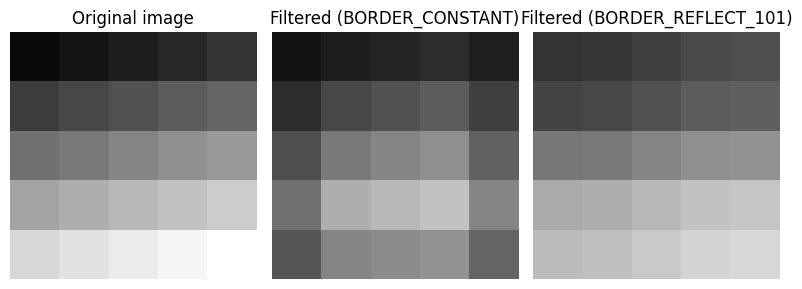

In [ ]:
# Create a 5x5 image
image = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
], dtype=np.float32)

# Define a simple 3x3 kernel (mean filter)
kernel = np.ones((3, 3), np.float32) / 9 # padding size = (3 - 1) / 2 = 1

# Convolution for BORDER_CONSTANT (zero padding)
filtered_zero = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_CONSTANT)
print("Filtered image with BORDER_CONSTANT (zero padding):\n", filtered_zero)

# Convolution for BORDER_REFLECT_101
filtered_reflect_101 = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_REFLECT_101)
print("Filtered image with BORDER_REFLECT_101:\n", filtered_reflect_101)

# Plot the original image, padded images, and filtered images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=25)
plt.title('Original image')
plt.axis('off')

# Filtered image with BORDER_CONSTANT (unpadded)
plt.subplot(1, 3, 2)
plt.imshow(filtered_zero, cmap='gray', vmin=0, vmax=25)
plt.title('Filtered (BORDER_CONSTANT)')
plt.axis('off')

# Filtered image with BORDER_REFLECT_101 (unpadded)
plt.subplot(1, 3, 3)
plt.imshow(filtered_reflect_101, cmap='gray', vmin=0, vmax=25)
plt.title('Filtered (BORDER_REFLECT_101)')
plt.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

OpenCV also provides a specific **function** to apply the **mean filter**, `cv2.blur(image, kernel_size)`, which receives as inputs the original image and the kernel size $(m,n)$, and returns the modified image.

In this case, the **kernel definition** becomes **implicit** and there is no need to define it.

In [ ]:
# Create a 5x5 image
image = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
], dtype=np.float32)

# Case #3

# Apply cv2.blur to filter with a 3x3 kernel (mean filter) and BORDER_CONSTANT (zero padding)
# cv2.blur handles the padding internally and always uses a mean filter
filtered_blur = cv2.blur(image, (3, 3), borderType=cv2.BORDER_CONSTANT) # assumes padding with 0's
print("Filtered image with BORDER_CONSTANT (cv2.blur, zero padding):\n", filtered_blur)

Filtered image with BORDER_CONSTANT (cv2.blur, zero padding):
 [[ 1.7777778  3.         3.6666667  4.3333335  3.1111112]
 [ 4.3333335  7.         8.         9.         6.3333335]
 [ 7.6666665 12.        13.        14.         9.666667 ]
 [11.        17.        18.        19.        13.       ]
 [ 8.444445  13.        13.666667  14.333333   9.777778 ]]


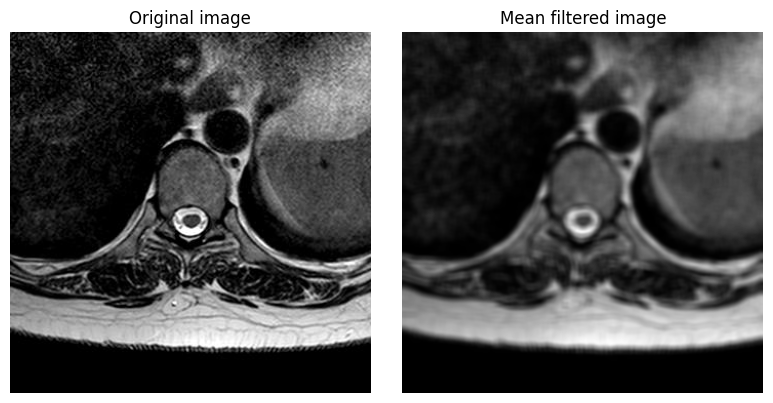

In [ ]:
# Load the image in grayscale
image_path = '/content/drive/MyDrive/PIM/Images/IM000004.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply the mean filter using cv2.blur()
mean_filtered_image = cv2.blur(image, (7, 7))

# Display the original and mean filtered images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Original image')
plt.axis('off')

# Mean filtered image
plt.subplot(1, 2, 2)
plt.imshow(mean_filtered_image, cmap='gray', vmin=0, vmax=255)
plt.title('Mean filtered image')
plt.axis('off')

plt.tight_layout()
plt.show()

### 4.2. Gaussian Filter

When all of the coefficients in a kernel are not uniform, the filter is called **weighted filter**.

In it, each coefficient is multiplied with the corresponding pixel value in the sub-image, similar to the non-weighted filter, but, in this case, **some pixels contribute more to the average than others**.

To ensure the image maintains its original intensity scale after filtering, it should be **divided by the total weight of the filter** (sum of all coefficients) during normalization.

A common example of a weighted mean filter is the **Gaussian filter**, with the kernel:

$$
\begin{array}{|c|c|c|}
\hline
1 & 2 & 1 \\
\hline
2 & 4 & 2 \\
\hline
1 & 2 & 1 \\
\hline
\end{array}
$$
<p align="center">Figure 16: Kernel for the Gaussian (or blur) filter.</p>

For **normalization**, this kernel is divided by the sum of the weights (16 in this case):

$$
\begin{array}{|c|c|c|}
\hline
\dfrac{1}{16} & \dfrac{2}{16} & \dfrac{1}{16} \\
\hline
\dfrac{2}{16} & \dfrac{4}{16} & \dfrac{2}{16} \\
\hline
\dfrac{1}{16} & \dfrac{2}{16} & \dfrac{1}{16} \\
\hline
\end{array}
$$
<p align="center">Figure 17: Normalized kernel for the Gaussian filter.</p>

In addition to reduce the noise (like the mean filter), the Gaussian filter **preserves edges better**, due to the **weight of the central pixels**. It provides a good **balance** between image smoothing and preserving important features like edges.

For example, given the following image (in form of a matrix), the calculation of the new value for the center pixel (2,2) after applying a weighted (Gaussian) filter can be done as:

$$
\begin{array}{|c|c|c|c|c|}
\hline
1 & 2 & 3 & 4 & 5 \\
\hline
6 & 7 & 8 & 9 & 10 \\
\hline
11 & 12 & 13 & 14 & 15 \\
\hline
16 & 17 & 18 & 19 & 20 \\
\hline
21 & 22 & 23 & 24 & 25 \\
\hline
\end{array}
$$

$$
I_{\text{new}}(2, 2) = \frac{1}{16} \times (1 \cdot 7 + 2 \cdot 8 + 1 \cdot 9 + 2 \cdot 12 + 4 \cdot 13 + 2 \cdot 14 + 1 \cdot 17 + 2 \cdot 18 + 1 \cdot 19) = 13
$$

Similarly, the new values for elements (1,1) and (3,3) can be computed as:

$$
I_{\text{new}}(1,1) = \text{New Value} = \frac{1}{16} \times (1 \cdot 1 + 2 \cdot 2 + 1 \cdot 3 + 2 \cdot 6 + 4 \cdot 7 + 2 \cdot 8 + 1 \cdot 11 + 2 \cdot 12 + 1 \cdot 13) = 7
$$

$$
I_{\text{new}}(3,3) = \text{New Value} = \frac{1}{16} \times (1 \cdot 13 + 2 \cdot 14 + 1 \cdot 15 + 2 \cdot 18 + 4 \cdot 19 + 2 \cdot 20 + 1 \cdot 23 + 2 \cdot 24 + 1 \cdot 25) = 19
$$

From the above calculations, it can be seen that the new pixel values for the chosen examples **remain the same as the original values**.

This can happen in regions where the image is already **smooth** and the pixel intensities do not vary significantly within the filter window.

However, this result is **not necessarily true for all pixels**, especially in images with more variation.

Original image:
[[  1.   1.   1.   1.   1.]
 [  1.  50.  50.  50.   1.]
 [  1.  50. 100.  50.   1.]
 [  1.  50.  50.  50.   1.]
 [  1.   1.   1.   1.   1.]]

Padded image:
[[  0.   0.   0.   0.   0.   0.   0.]
 [  0.   1.   1.   1.   1.   1.   0.]
 [  0.   1.  50.  50.  50.   1.   0.]
 [  0.   1.  50. 100.  50.   1.   0.]
 [  0.   1.  50.  50.  50.   1.   0.]
 [  0.   1.   1.   1.   1.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.]]

Mean kernel:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]

Gaussian kernel:
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]

Mean filtered Image:
[[ 5.888889  11.555555  17.        11.555555   5.888889 ]
 [11.555555  28.333332  39.222225  28.333332  11.555555 ]
 [17.        39.222225  55.555565  39.222225  17.       ]
 [11.555554  28.333332  39.222225  28.333332  11.555554 ]
 [ 5.888889  11.555554  17.        11.555554   5.8888893]]

Gaussian filtered Image:
[[ 3.625

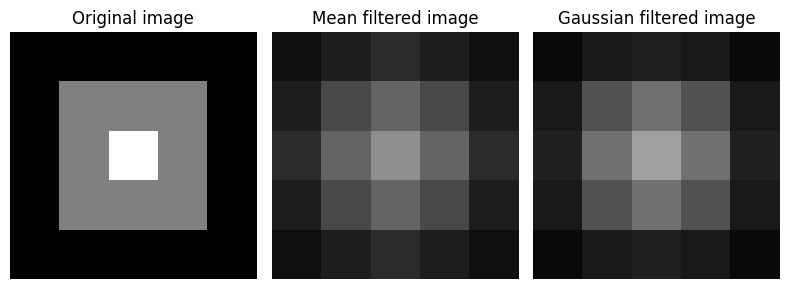

In [ ]:
# Original image
image = np.array([
    [1, 1, 1, 1, 1],
    [1, 50, 50, 50, 1],
    [1, 50, 100, 50, 1],
    [1, 50, 50, 50, 1],
    [1, 1, 1, 1, 1]
], dtype=np.float32)

# Mean filter kernel
mean_kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
], np.float32) / 9

# Gaussian filter kernel
gaussian_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], np.float32) / 16

# Padding size for the 3x3 kernel
top = bottom = left = right = 1

# Zero padding
padded_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)

# Apply mean and Gaussian filters
mean_filtered_padded = cv2.filter2D(padded_image, -1, mean_kernel)
gaussian_filtered_padded = cv2.filter2D(padded_image, -1, gaussian_kernel)

# Remove padding
mean_filtered_image = mean_filtered_padded[top:-bottom, left:-right]
gaussian_filtered_image = gaussian_filtered_padded[top:-bottom, left:-right]

# Print the results
print("Original image:")
print(image)
print("\nPadded image:")
print(padded_image)
print("\nMean kernel:")
print(mean_kernel)
print("\nGaussian kernel:")
print(gaussian_kernel)
print("\nMean filtered Image:")
print(mean_filtered_image)
print("\nGaussian filtered Image:")
print(gaussian_filtered_image)

# Plot the original image, mean filtered image, and Gaussian filtered image
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=100)
plt.title('Original image')
plt.axis('off')

# Mean filtered image
plt.subplot(1, 3, 2)
plt.imshow(mean_filtered_image, cmap='gray', vmin=0, vmax=100)
plt.title('Mean filtered image')
plt.axis('off')

# Gaussian filtered image
plt.subplot(1, 3, 3)
plt.imshow(gaussian_filtered_image, cmap='gray', vmin=0, vmax=100)
plt.title('Gaussian filtered image')
plt.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

Similarly to the mean filter, the Gaussian filter can also be computed with a **specific function** of OpenCV: `cv2.GaussianBlur()`.

In [ ]:
# Original image
image = np.array([
    [1, 1, 1, 1, 1],
    [1, 50, 50, 50, 1],
    [1, 50, 100, 50, 1],
    [1, 50, 50, 50, 1],
    [1, 1, 1, 1, 1]
], dtype=np.float32)

# Apply Gaussian blur
# (3, 3): kernel size
# sigmaX = 1: sigma value used in the Gaussian function
gaussian_blurred = cv2.GaussianBlur(image, (3, 3), sigmaX=1)

# Print the results
print("\nGaussian filtered Image:")
print(gaussian_blurred)


Gaussian filtered Image:
[[15.722267 20.497591 27.858725 20.497591 15.722267]
 [20.497591 30.57752  42.762707 30.57752  20.497591]
 [27.858725 42.762707 60.209    42.762707 27.858725]
 [20.497591 30.57752  42.762707 30.57752  20.497591]
 [15.722267 20.497591 27.858725 20.497591 15.722267]]


The **result** obtained with the `GaussianBlur` function is **slightly different** from that obtained with the 3-by-3 Gaussian kernel because `cv2.GaussianBlur` dynamically calculates a **more accurate** Gaussian kernel based on the specified kernel size and sigma values, while the manually created 3-by-3 kernel is an **approximation** of the Gaussian function:

$$G(x, y) = \frac{1}{2\pi\sigma^2} \exp\left(-\frac{x^2 + y^2}{2\sigma^2}\right)$$

where:

*	$G(x, y)$ is the value of the Gaussian function at position $(x, y)$,
* $\sigma$ is the standard deviation of the Gaussian function, which controls the spread or “width” of the kernel (a larger  $\sigma$ results in a more spread-out kernel, applying a stronger blur),
* $(x, y)$ are the coordinates in the kernel, with $x$ and $y$  representing the horizontal and vertical distances from the center of the kernel.

<img src="https://i0.wp.com/theailearner.com/wp-content/uploads/2019/05/normal4.png?w=721&ssl=1" alt="Caption" width="500">
<p style="text-align: center;">Figure 18: Gaussian function with mean = 0 and standard deviation = $\sigma$. Source: <a href="https://theailearner.com/tag/cv2-getgaussiankernel/">TheAIlearner.com.</a></p>

#### Outer product

The outer product is a mathematical operation that takes two **vectors** and produces a **matrix** by multiplying each element of one vector by every element of the other.

In the context of image processing, the outer product is often **used to generate a 2D filter (or kernel) from a 1D kernel**.

Given two vectors, $\mathbf{v_1}$ and $\mathbf{v_2}$, their outer product is defined as:

$$\mathbf{M} = \mathbf{v_1} \otimes \mathbf{v_2}$$

In image processing, a 1D Gaussian kernel is used to smooth data along one axis (either horizontal or vertical). To extend this smoothing to two dimensions, the outer product of the 1D Gaussian kernel can be computed with itself.

If the 1D Gaussian kernel is defined as:

$$\mathbf{v} = \begin{bmatrix} a \\ b \\ c \end{bmatrix}$$

then, the outer product of $\mathbf{v}$ with itself is:

$$\mathbf{K} = \mathbf{v} \otimes \mathbf{v} = \begin{bmatrix}
a \cdot a & a \cdot b & a \cdot c \\
b \cdot a & b \cdot b & b \cdot c \\
c \cdot a & c \cdot b & c \cdot c
\end{bmatrix}$$

This matrix $\mathbf{K}$ represents the 2D Gaussian kernel, which is symmetrical and can be applied to an image for Gaussian smoothing.


In [ ]:
# Define kernel size and sigma
ksize = 3  # Kernel size (must be odd)
sigma = 1  # Standard deviation

# Get 1D Gaussian kernel using cv2.getGaussianKernel
gaussian_kernel_1d = cv2.getGaussianKernel(ksize, sigma)

# Compute the 2D Gaussian kernel by taking the outer product of the 1D kernel with itself
gaussian_kernel_2d = np.outer(gaussian_kernel_1d, gaussian_kernel_1d)

# Print the resulting 1D and 2D Gaussian kernels
print("1D Gaussian Kernel:\n", gaussian_kernel_1d)
print("\n2D Gaussian Kernel:\n", gaussian_kernel_2d)

1D Gaussian Kernel:
 [[0.27406862]
 [0.45186276]
 [0.27406862]]

2D Gaussian Kernel:
 [[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


### 4.2. Median Filter

Functions that do not satisfy $f(x + y) = f(x) + f(y)$ are **non-linear**. One of the most simple and used non-linear filters is the **median filter**.

In this case, a sliding window is positioned over the image at pixel coordinates $(i, j)$. This window gathers all pixel values within its span. The **median value** of these collected pixels is then computed and assigned to the pixel located at $(i, j)$ in the processed image.

**For example**, if a 3-by-3 section of an image has pixel values 4, 9, 3, 10, 1, 8, 6, 12, and 2, first, these values are **sorted** in ascending order (1, 2, 3, 4, 6, 8, 9, 10, 12), and then the **median value** (which divides the sorted list into two equal parts) is obtained: 6. Thus, the pixel at position $(i, j)$ will be updated to 6 in the filtered image.

The median filter function **reduces noise in images**, particularly **salt-and-pepper or impulse noise**, by replacing noisy pixels with more stable median values derived from their surroundings.

As another example, let's consider a 3-by-3 window in an image which has the following values (the impulse noise is represented as a bright pixel in a dark area):

$$
\begin{array}{|c|c|c|}
\hline
10 & 0 & 15 \\
\hline
3 & 240 & 5 \\
\hline
20 & 0 & 5 \\
\hline
\end{array}
$$

After sorting the values in ascending order, it results [0, 0, 3, 5, 5, 10, 15, 20, 240]. So the median is the middle value, 5, which replaces the bright pixel (240) with a dark value (5).

In Python, the median filter can be implemented whether with OpenCV or with SciPy functions:

* OpenCV:

  `median_filtered_image = cv2.medianBlur(image, ksize)`

  OpenCV always uses border replication (nearest neighbor padding, `cv2.BORDER_REPLICATE`) to handle the edges.

* SciPy:

  `median_filtered_image = scipy.ndimage.median_filter(input, size=3, footprint=None, output=None, mode='reflect', cval=0.0, origin=0)`

  where the **parameters** of the function are the following:

    * `input`: image or array (it can be of any dimension),
    * `size`: size of the filter along each axis (a scalar or a sequence of scalars),
    * `footprint`: defines the shape of the filter if this is other than a square or rectangular filter defined by size,
    * `output`: array where the output will be stored; if `None`, a new array will be created,
    * `mode`: determines how the input array is extended at the boundaries. Options include:
      * `'reflect'` (default): reflect the input at the boundaries (e.g., `[1, 2, 3, 4] -> [2, 1, 1, 2, 3, 4, 4, 3]`)
      * `'constant'`: pad the input with a constant value defined by `cval` (used also for zero padding)
      * `'nearest'`: repeat the edge values
      * `'mirror'`: mirror the input, similar to `'reflect'` but without duplicating the edge values ( (e.g., `[1, 2, 3, 4] -> [3, 2, 1, 2, 3, 4, 3, 2]`))
      * `'wrap'`: wrap the input around
    * `cval`: value for padding when mode='constant' (default is 0.0),
    * `origin`: Controls the placement of the filter (it is 0 by default, centered on the pixel being processed).






In [ ]:
# Original image
original_image = np.array([
    [1, 1, 1, 1, 1],
    [1, 50, 50, 50, 1],
    [1, 50, 100, 50, 1],
    [1, 50, 50, 50, 1],
    [1, 1, 1, 1, 1]
], dtype=np.float32)

# Median filter implemented with OpenCV

# Convert the image to uint8 since medianBlur requires this type
original_image_uint8 = original_image.astype(np.uint8)

# Apply median filter with a 3x3 kernel
median_filtered_image = cv2.medianBlur(original_image_uint8, ksize=3)

# Print the results
print("Original Image:")
print(original_image)
print("\nMedian Filtered Image (OpenCV):")
print(median_filtered_image)

Original Image:
[[  1.   1.   1.   1.   1.]
 [  1.  50.  50.  50.   1.]
 [  1.  50. 100.  50.   1.]
 [  1.  50.  50.  50.   1.]
 [  1.   1.   1.   1.   1.]]

Median Filtered Image (OpenCV):
[[ 1  1  1  1  1]
 [ 1  1 50  1  1]
 [ 1 50 50 50  1]
 [ 1  1 50  1  1]
 [ 1  1  1  1  1]]


In [ ]:
# Median filter implemented with SciPy
import scipy.ndimage

# Apply median filter
median_filtered_image = scipy.ndimage.median_filter(original_image, size=3)

# Print the results
print("Original Image:")
print(original_image)
print("\nMedian Filtered Image (Scipy):")
print(median_filtered_image)

Original Image:
[[  1.   1.   1.   1.   1.]
 [  1.  50.  50.  50.   1.]
 [  1.  50. 100.  50.   1.]
 [  1.  50.  50.  50.   1.]
 [  1.   1.   1.   1.   1.]]

Median Filtered Image (Scipy):
[[ 1.  1.  1.  1.  1.]
 [ 1.  1. 50.  1.  1.]
 [ 1. 50. 50. 50.  1.]
 [ 1.  1. 50.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


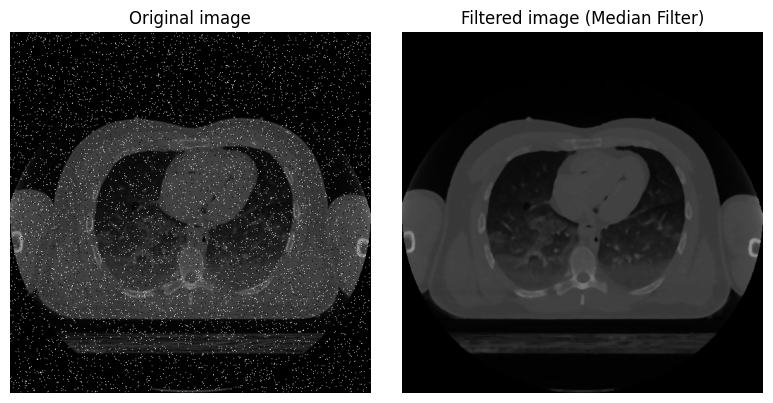

In [ ]:
# Load the image in grayscale
image_path = '/content/drive/MyDrive/PIM/Images/CT_saltandpepper.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply median filter with a filter size of 5x5
filtered_image = cv2.medianBlur(image, 5)

# Display the original and filtered images in a 1x2 array
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Original image')
plt.axis('off')

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray', vmin=0, vmax=255)
plt.title('Filtered image (median filter)')
plt.axis('off')

plt.tight_layout()
plt.show()

### 4.3. Maximum and Minimum Filters

#### **Maximum filter**

This filter **highlights the brightest points** in an image by replacing the value at position $(i, j)$ with the **maximum value** from the surrounding sub-image (of kernel size). This is known as _dilation_ in morphological operations.

In medical images, it can be used to:

* Enhance bright features, such as blood vessels, bones, or tumors.
* Reduce noise (small dark spots).
* Enhances the visibility of objects and structures before segmentation.

The **functions** for the maximum filter are:

* SciPy:

      max_filtered_image = scipy.ndimage.maximum_filter(image, size)

  Its parameters are similar to the `median_filter` function. It uses `'reflect'` mode by default for padding.

* OpenCV:

      max_filtered_image = cv2.dilate(src, kernel, dst=None, anchor=None, iterations=1, borderType=None, borderValue=None)

  where the **parameters** are:

    * `src`: grayscale or binary image (typically of type uint8, but other types like float32 can also be used),
    * `kernel`: structuring element (kernel),
    * `dst`: destination image, which will store the output (if `None`, the result is returned as a new image),
    * `anchor`: anchor point within the kernel, point relative to which the dilation is applied (by default it is (-1, -1), which means that the anchor should be placed at the center of the kernel),
    * `iterations`: number of times dilation is applied,
    * `borderType`: specifies how the image borders are handled (default is `cv2.BORDER_CONSTANT`, but other border types such as `cv2.BORDER_REFLECT`, `cv2.BORDER_REPLICATE`, etc., can be used),
    * `borderValue`: value used in case of a constant border type (the default is 0).



In [ ]:
import scipy.ndimage

# Create a sample 5x5 image (as float32 or uint8)
image = np.array([
    [1, 2, 3, 4, 5],
    [6, 25, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 1, 20],
    [21, 22, 23, 24, 25]
], dtype=np.float32) # SciPy allows float32, float64, int32 and uint8
                     # uint8 is required for OpenCV

# Apply the maximum filter with a 3x3 neighborhood (SciPy)
max_filtered_image_scipy = scipy.ndimage.maximum_filter(image, size=3)


# OpenCV expects images to be in uint8 for filtering operations
# Convert the image to uint8 if is not in that format
image_uint8 = image.astype(np.uint8)

# Apply the maximum filter with a 3x3 neighborhood (OpenCV using dilation)
# Create a 3x3 kernel of ones
kernel = np.ones((3, 3), np.uint8)

# Apply dilation (maximum filter) using OpenCV
max_filtered_image_opencv = cv2.dilate(image, kernel)

# Display the original, SciPy-filtered, and OpenCV-filtered images
print("Original image:\n", image)
print("Max filtered Image (SciPy - maximum_filter):\n", max_filtered_image_scipy)
print("Max filtered Image (OpenCV - dilation):\n", max_filtered_image_opencv)

Original image:
 [[ 1.  2.  3.  4.  5.]
 [ 6. 25.  8.  9. 10.]
 [11. 12. 13. 14. 15.]
 [16. 17. 18.  1. 20.]
 [21. 22. 23. 24. 25.]]
Max filtered Image (SciPy - maximum_filter):
 [[25. 25. 25. 10. 10.]
 [25. 25. 25. 15. 15.]
 [25. 25. 25. 20. 20.]
 [22. 23. 24. 25. 25.]
 [22. 23. 24. 25. 25.]]
Max filtered Image (OpenCV - dilation):
 [[25. 25. 25. 10. 10.]
 [25. 25. 25. 15. 15.]
 [25. 25. 25. 20. 20.]
 [22. 23. 24. 25. 25.]
 [22. 23. 24. 25. 25.]]


#### **Minimum filter**

The minimum filter is similar to the maximum filter, but **enhances the darkest points** in the image (_erosion_).

When a kernel is applied to a specific pixel, the new value is computed as the **minimum** of the neighborhood.

Their applications are similar to that of the maximum filter, but with the opposite intensity (dark $\leftrightarrow$ white).

The functions for the minimum filter are:

* OpenCV: `min_filtered_image = cv2.erode(image, kernel)`

* Scipy: `min_filtered_image = scipy.ndimage.minimum_filter(image, size)`

In [ ]:
# Create a sample 5x5 image (as float32 or uint8)
image = np.array([
    [1, 2, 3, 4, 5],
    [6, 25, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 1, 20],
    [21, 22, 23, 24, 25]
], dtype=np.float32)  # SciPy allows float32, float64, int32, and uint8
                      # uint8 is required for OpenCV

# Apply the minimum filter with a 3x3 neighborhood (SciPy)
min_filtered_image_scipy = scipy.ndimage.minimum_filter(image, size=3)

# OpenCV expects images to be in uint8 for filtering operations
# Convert the image to uint8 if it is not in that format
image_uint8 = image.astype(np.uint8)

# Apply the minimum filter with a 3x3 neighborhood (OpenCV using erosion)
# Create a 3x3 kernel of ones
kernel = np.ones((3, 3), np.uint8)

# Apply erosion (minimum filter) using OpenCV
min_filtered_image_opencv = cv2.erode(image_uint8, kernel)

# Display the original, SciPy-filtered, and OpenCV-filtered images
print("Original image:\n", image)
print("Min filtered Image (SciPy - minimum_filter):\n", min_filtered_image_scipy)
print("Min filtered Image (OpenCV - erosion):\n", min_filtered_image_opencv)

Original image:
 [[ 1.  2.  3.  4.  5.]
 [ 6. 25.  8.  9. 10.]
 [11. 12. 13. 14. 15.]
 [16. 17. 18.  1. 20.]
 [21. 22. 23. 24. 25.]]
Min filtered Image (SciPy - minimum_filter):
 [[ 1.  1.  2.  3.  4.]
 [ 1.  1.  2.  3.  4.]
 [ 6.  6.  1.  1.  1.]
 [11. 11.  1.  1.  1.]
 [16. 16.  1.  1.  1.]]
Min filtered Image (OpenCV - erosion):
 [[ 1  1  2  3  4]
 [ 1  1  2  3  4]
 [ 6  6  1  1  1]
 [11 11  1  1  1]
 [16 16  1  1  1]]


### 4.4. Bilateral Filter

The bilateral filter [3] is a **non-linear, edge-preserving, and noise-reducing smoothing filter**.

Unlike traditional filters like Gaussian or mean filters that blur edges, the bilateral filter **maintains sharp edges** by taking into account both the **spatial distance and intensity difference between pixels**.

The bilateral filter smooths images while preserving edges by combining **two types of filtering**:

* **Spatial filtering**: considers the **spatial proximity** of pixels. Closer pixels are given higher weights.

* **Range filtering**: considers the **difference in pixel intensities**. Pixels with **similar intensities receive higher weights**, preserving edges by reducing the influence of pixels with different intensities.

The bilateral filter is considered an **adaptive filter** because it **adapts the amount of smoothing** applied at each pixel **based on the local properties** of the image (spatial distance and intensity difference):

* In homogeneous regions (where pixel intensities are similar), the bilateral filter behaves like a normal Gaussian blur, smoothing the region.

* Near edges (where intensity differences are high), the filter reduces smoothing because of the intensity-based weighting, which helps to preserve the sharpness of edges.

This makes the bilateral filter useful in tasks like noise reduction where preserving details is important.

[3]: https://www.cse.iitd.ac.in/~pkalra/col783-2017/bilateral-filtering.pdf


**Mathematical foundations of bilateral filter**

The bilateral filter works by **applying a weighted average to a pixel's neighborhood**, where the weights depend on both:

* The **spatial distance between pixels**: pixels that are spatially close to the pixel being filtered have more influence.

* The **intensity difference between pixels**: pixels that have a similar color or brightness to the pixel being filtered also have more influence.

The mathematical expression for the bilateral filter is:

$$I_f(p) = \dfrac{1}{W_p} \sum_{q \in S} G_s(||p - q||) \cdot G_r(||I(p) - I(q)||) \cdot I(q)$$

where:
* $I_f(p)$ is the filtered intensity at pixel $p$,
* $I(p)$ is the intensity at pixel $p$,
* $I(q)$ is the intensity at neighboring pixel $q$,
* $S$ is the neighborhood of pixel $p$,
* $G_s(||p - q||)$ is the spatial Gaussian function, which depends on the distance between pixels $p$ and $q$:
$$
G_s(||p - q||) = \exp\left( -\frac{||p - q||^2}{2 \sigma_s^2} \right)
$$
* $||p - q||$ is the Euclidean distance between the two pixels.
* $\sigma_s$ controls the spatial influence of the filter (a larger $\sigma_s$ means more distant pixels will have more influence, smoothing the image),
* $G_r(||I(p) - I(q)||)$ is the range Gaussian function, which depends on the intensity difference between $p$ and $q$,
$$
G_r(||I(p) - I(q)||) = \exp\left( -\frac{(I(p) - I(q))^2}{2 \sigma_r^2} \right)
$$
* $||I(p) - I(q)||$ is the absolute intensity difference between the two pixels,
* $\sigma_r$ controls how much influence the intensity difference has (a smaller $\sigma_r$ will cause pixels with similar intensities to have more influence, preserving edges),
* $W_p$ is a normalization factor that ensures the sum of the weights equals 1, adjusting the influence of nearby pixels on the central pixel. This ensures the result reflects a proper weighted average of intensity values, considering both spatial proximity and intensity differences.
$$
W_p = \sum_{q \in S} G_s (||p - q||) \cdot G_r(||I(p) - I(q)||)
$$

**Steps of the algorithm:**

1. **Select a pixel** $p$ in the image.
2. **Define a neighborhood** $S$ around pixel $p$ (square window).
3. **Compute the spatial weight** $G_s$, based on the Euclidean distance between the center pixel $p$ and neighboring pixel $q$. This weight decreases as the distance between the pixels increases.
4. **Compute the range weight** $G_r$, based on the intensity difference between the center pixel $p$ and neighboring pixel $q$. This weight decreases as the intensity difference increases, preserving edges.
5. **Combine the weights** $G_s$ and $G_r$ by multiplication to compute the new intensity at pixel $p$.




The implementation of the bilateral filter in OpenCV is done using the **function** `cv2.bilateralFilter`.

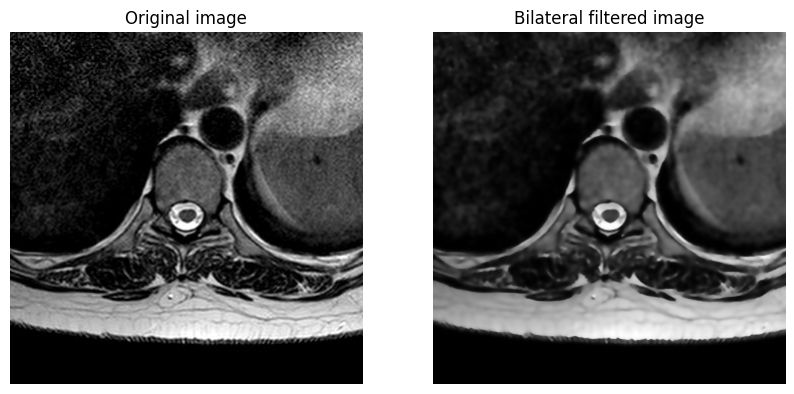

In [ ]:
# Load the image in grayscale
image_path = '/content/drive/MyDrive/PIM/Images/IM000004.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply bilateral filter
# Parameters: (image, diameter of neighborhood, sigmaColor, sigmaSpace)
# - d: diameter of the pixel neighborhood (area around each pixel that is considered for filtering)
# - sigmaColor: filter's sensitivity to intensity differences (higher values mean
#   that more distant intensity values can influence each other, leading to more blurring)
# - sigmaSpace: filter's sensitivity to spatial distance (higher values mean that
#   pixels further from the target pixel have more influence, resulting in more smoothing)
bilateral_filtered_image = cv2.bilateralFilter(image, d=7, sigmaColor=50, sigmaSpace=50)

# Plot the original image and the filtered image side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

# Bilateral filtered image
plt.subplot(1, 2, 2)
plt.imshow(bilateral_filtered_image, cmap='gray')
plt.title('Bilateral filtered image')
plt.axis('off')

# Show the plot
plt.show()

## 5.- Edge Enhancement

Edge enhancement (or **sharpening filters**) is aimed at **improving the visibility of edges** in an image, which are areas with significant intensity changes.

Edge enhancement works by **highlight high-frequency components** (edges) of the image while **suppressing low-frequency components** (smooth areas).

This is used in medical imaging to **highlight details of organs and body structures**, typically as a preprocessing step before applying other algorithms like segmentation.

Usual sharpening **kernels** for edge enhancement are:

$$
\begin{array}{|c|c|c|}
\hline
0 & -1 & 0 \\
\hline
-1 & 5 & -1 \\
\hline
0 & -1 & 0 \\
\hline
\end{array}
\quad
\text{and}
\quad
\begin{array}{|c|c|c|}
\hline
-1 & -1 & -1 \\
\hline
-1 & 9 & -1 \\
\hline
-1 & -1 & -1 \\
\hline
\end{array}
$$
<p align="center">Figure 19: Sharpening filters.</p>

Sharpening filters work by **emphasizing the difference between a pixel and its neighbors** to make edges and transitions in the image more pronounced.

To achieve this, the kernel usually contains a **strong positive value at the center** (representing the current pixel), balanced by **smaller negative values surrounding it** (representing the neighboring pixels).

This structure **highlights** sharp transitions **without** entirely **eliminating** the overall image content:

  * The non-zero sum ensures that the **image content is preserved while enhancing the contrast at the edges**.

  *	If the **sum were zero**, like in edge detection filters, the result would **only emphasize edges while diminishing the other parts** of the image.

In [ ]:
# Create a 7x7 matrix
image = np.array([
    [1, 1, 2, 2, 2, 1, 1],
    [1, 1, 2, 2, 2, 1, 1],
    [3, 4, 3, 3, 4, 3, 4],
    [1, 1, 2, 2, 2, 1, 1],
    [1, 1, 2, 2, 2, 1, 1],
    [1, 1, 2, 2, 2, 1, 1],
    [1, 1, 2, 2, 2, 1, 1]
], dtype=np.uint8)

# Define sharpening kernels
sharpening_kernel_1 = np.array([[ 0, -1,  0],
                                [-1,  5, -1],
                                [ 0, -1,  0]])

sharpening_kernel_2 = np.array([[-1, -1, -1],
                                [-1,  9, -1],
                                [-1, -1, -1]])

# Apply sharpening kernels to the image
sharpened_image_1 = cv2.filter2D(image, -1, sharpening_kernel_1)
sharpened_image_2 = cv2.filter2D(image, -1, sharpening_kernel_2)

# Print the original array and the result of convolution
print("Original 7x7 Image:\n", image, "\n")
print("Result of Convolution with Kernel 1:\n", sharpened_image_1, "\n")
print("Result of Convolution with Kernel 2:\n", sharpened_image_2, "\n")

Original 7x7 Image:
 [[1 1 2 2 2 1 1]
 [1 1 2 2 2 1 1]
 [3 4 3 3 4 3 4]
 [1 1 2 2 2 1 1]
 [1 1 2 2 2 1 1]
 [1 1 2 2 2 1 1]
 [1 1 2 2 2 1 1]] 

Result of Convolution with Kernel 1:
 [[ 1  0  3  2  3  0  1]
 [ 0  0  2  1  1  0  0]
 [ 5 12  4  4 10  5 12]
 [ 0  0  2  1  1  0  0]
 [ 1  0  3  2  3  0  1]
 [ 1  0  3  2  3  0  1]
 [ 1  0  3  2  3  0  1]] 

Result of Convolution with Kernel 2:
 [[ 1  0  5  2  5  0  1]
 [ 0  0  0  0  0  0  0]
 [13 22 10  8 20 11 24]
 [ 0  0  0  0  0  0  0]
 [ 1  0  5  2  5  0  1]
 [ 1  0  5  2  5  0  1]
 [ 1  0  5  2  5  0  1]] 



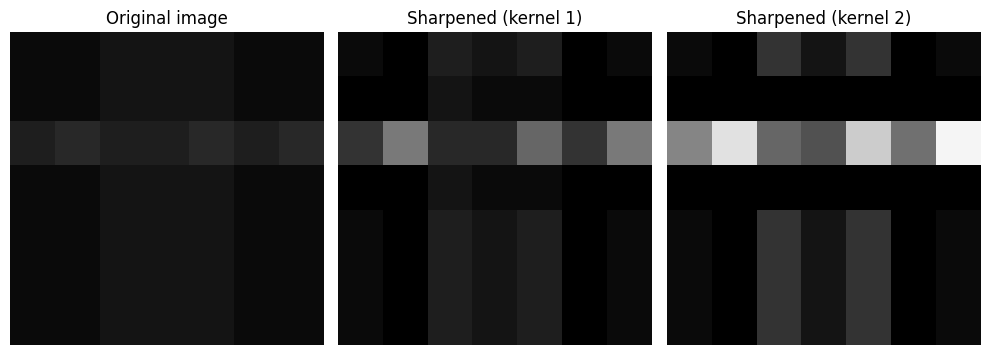

In [ ]:
# Plot the original image and the sharpened images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=25)
plt.title('Original image')
plt.axis('off')

# Sharpened image with kernel 1
plt.subplot(1, 3, 2)
plt.imshow(sharpened_image_1, cmap='gray', vmin=0, vmax=25)
plt.title('Sharpened (kernel 1)')
plt.axis('off')

# Sharpened image with kernel 2
plt.subplot(1, 3, 3)
plt.imshow(sharpened_image_2, cmap='gray', vmin=0, vmax=25)
plt.title('Sharpened (kernel 2)')
plt.axis('off')

# Adjust layout and display
plt.tight_layout()
plt.show()

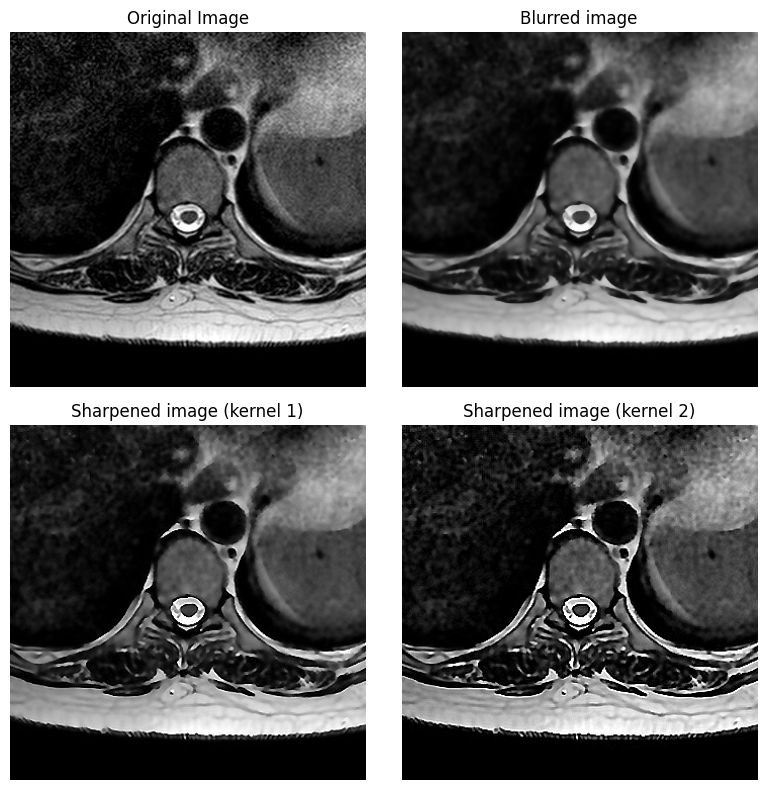

In [ ]:
# Load the image in grayscale
image_path = '/content/drive/MyDrive/PIM/Images/IM000004.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define sharpening kernel
sharpening_kernel_1 = np.array([[  0, -1,  0],
                              [ -1,  5, -1],
                              [  0, -1,  0]])

sharpening_kernel_2 = np.array([[ -1, -1, -1],
                              [ -1,  9, -1],
                              [ -1, -1, -1]])

# Apply bilateral filter
bilateral_filtered_image = cv2.bilateralFilter(image, d=7, sigmaColor=50, sigmaSpace=50)

# Apply sharpening kernels to the image
sharpened_image_1 = cv2.filter2D(bilateral_filtered_image, -1, sharpening_kernel_1)
sharpened_image_2 = cv2.filter2D(bilateral_filtered_image, -1, sharpening_kernel_2)

# Display the results
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Blurred image")
plt.imshow(bilateral_filtered_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Sharpened image (kernel 1)")
plt.imshow(sharpened_image_1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Sharpened image (kernel 2)")
plt.imshow(sharpened_image_2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.tight_layout()
plt.show()

## 6.- Edge Detection using Derivatives

In an image, **edges** refer to pixels where there is a significant **change in intensity between adjacent regions**.

Mathematically, these changes can be detected using the **first or second derivatives**, which are used to locate edges in images.

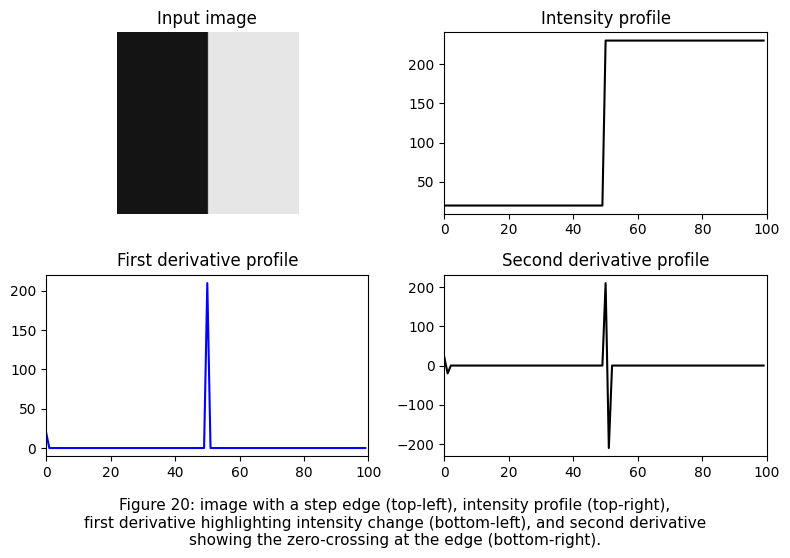

In [ ]:
# Create a simple image with a step edge
image = np.zeros((100, 100)) + 20
image[:, 50:] = 230

# Extract an intensity profile
intensity_profile = image[50, :]

# Compute first derivative
first_derivative = np.diff(intensity_profile, n=1, prepend=0)

# Compute second derivative
second_derivative = np.diff(first_derivative, n=1, prepend=0)

plt.figure(figsize=(8, 5))

# Plot input image
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Input image')
plt.axis('off')

# Plot intensity profile
plt.subplot(2, 2, 2)
plt.plot(intensity_profile, color='black')
plt.title('Intensity profile')
plt.xlim([0, 100])

# Plot first derivative profile
plt.subplot(2, 2, 3)
plt.plot(first_derivative, color='blue')
plt.title('First derivative profile')
plt.xlim([0, 100])

# Plot second derivative profile
plt.subplot(2, 2, 4)
plt.plot(second_derivative, color='black')
plt.title('Second derivative profile')
plt.xlim([0, 100])

# Adjust layout
plt.tight_layout()

# Add a caption below the plot
plt.figtext(0.5, -0.1,
    "Figure 20: image with a step edge (top-left), intensity profile (top-right),\n"
    "first derivative highlighting intensity change (bottom-left), and second derivative\n"
    "showing the zero-crossing at the edge (bottom-right).",
    ha="center", fontsize=11)

plt.show()

Medical images usually contain **noise** that **can affect zero-crossing detection**. Rapid intensity changes can also create **false edges**. To solve these issues, images are usually **pre-processed** before applying a second derivative filter.

### 6.1. First Derivative Filters

An image is a discrete set of pixels, so the **derivative** is calculated not as a continuous function, but using **discrete approximations**.

For a continuous function  $f(x, y)$, the **gradient vector** $\nabla f$ is defined as:

$$\nabla f = \begin{bmatrix} f_x \\ f_y \end{bmatrix} = \begin{bmatrix} \dfrac{\partial f}{\partial x} \\ \dfrac{\partial f}{\partial y} \end{bmatrix}$$

where $\dfrac{\partial f}{\partial x}$ and $\dfrac{\partial f}{\partial y}$ are the partial derivatives with respect to  $x$ (horizontal change) and  $y$ (vertical change), respectively.

The **magnitude** of the gradient, a scalar, represents the strength of the change in the image (how prominent is the edge), and is given by:

$$|\nabla f| = \sqrt{(f_x)^2 + (f_y)^2}$$

However, for practical computations, a **simplified version** of the gradient magnitude is preferred, given by:

$$|\nabla f| = |f_x| + |f_y|$$

The **angle** $\theta$ describes the orientation of the edge at each pixel in the image, that is, the direction in which the intensity is changing most rapidly ($\theta = 0º$ for horizontal edges, ...)

The angle is commonly used in segmentation, complememting the magnitude information for more accurate edge detection.

$$\theta = \arctan \left( \frac{f_y}{f_x} \right)$$

#### **Sobel filter**


The Sobel filter is a very common spatial filter based on the first derivative used to **detect horizontal and vertical edges**.

The kernel coefficients are given by:

$$
\begin{array}{|c|c|c|}
\hline
-1 & -2 & -1 \\
\hline
0 & 0 & 0 \\
\hline
1 & 2 & 1 \\
\hline
\end{array}
\quad \quad \quad
\begin{array}{|c|c|c|}
\hline
-1 & 0 & 1 \\
\hline
-2 & 0 & 2 \\
\hline
-1 & 0 & 1 \\
\hline
\end{array}
$$
<p align="center">Figure 21: Sobel masks for horizontal and vertical edges detection.</p>

The **left** kernel corresponds to the **Sobel Y mask**, which detects **horizontal edges**. It emphasizes **vertical changes** (i.e., changes in intensity along the y-axis) and so, it detects edges that are horizontal.

Similarly, the **right** kernel is the **Sobel X mask**, intended for detecting **vertical edges** by highlighting **changes along the x-axis**.

In the case of a 3-by-3 subimage:

$$
\begin{array}{|c|c|c|}
\hline
f_1 & f_2 & f_3 \\
\hline
f_4 & f_5 & f_6 \\
\hline
f_7 & f_8 & f_9 \\
\hline
\end{array}
$$
<p align="center">Figure 22: 3-by-3 subimage.</p>

the result of convolving the 3-by-3 subimage with the Sobel filters is given by:

$$
\begin{array}{|c|c|c|}
\hline
-f_1 & -2f_2 & -f_3 \\
\hline
0 & 0 & 0 \\
\hline
f_7 & 2f_8 & f_9 \\
\hline
\end{array}
\quad \quad \quad
\begin{array}{|c|c|c|}
\hline
-f_1 & 0 & f_3 \\
\hline
-2f_4 & 0 & 2f_6 \\
\hline
-f_7 & 0 & f_9 \\
\hline
\end{array}
$$
<p align="center">Figure 23: Result of convolving the sub-image with the horizontal and vertical Sobel masks.</p>


As a result of the convolution, $f_x$ and $f_y$ are obtained as:

$$f_x = (f_7 + 2f_8 + f_9) - (f_1 + 2f_2 + f_3)$$
$$f_y = (f_3 + 2f_6 + f_9) - (f_1 + 2f_4 + f_7)$$

The **sum of the coefficients** in the filter is **0**, to ensure that regions with **constant grayscale** are **unaffected** by the derivative filter.

Two more kernels are also defined to **detect diagonal edges**:

$$
\begin{array}{|c|c|c|}
\hline
-2 & -1 & 0 \\
\hline
-1 & 0 & 1 \\
\hline
0 & 1 & 2 \\
\hline
\end{array}
\quad \quad \quad
\begin{array}{|c|c|c|}
\hline
0 & -1 & -2 \\
\hline
1 & 0 & -1 \\
\hline
2 & 1 & 0 \\
\hline
\end{array}
$$

<p align="center">Figure 24: Sobel masks for diagonal edges detection.</p>

**Second-order derivative filters**, such as Laplacian, tend to **amplify noise** in images because they emphasize rapid intensity changes.

In contrast, **first-order derivative filters** like Sobel are designed to **reduce noise sensitivity** by using central coefficients that smooth the result.

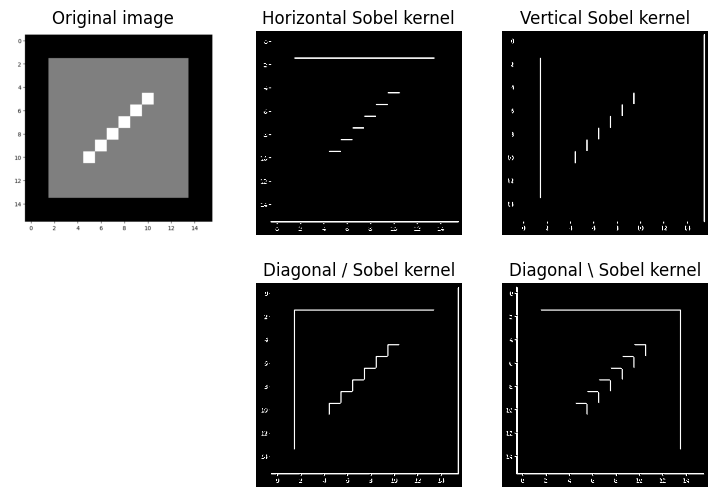

In [ ]:
# Load an image
image_path = '/content/drive/MyDrive/PIM/Images/2D_image.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert image to float32
image = image.astype(np.float32)

# Define the Sobel kernels
sobel_kernel_x = np.array([[-1, -2, -1],
                           [ 0,  0,  0],
                           [ 1,  2,  1]],
                           dtype=np.float32)  # Ensure the kernel is of type float32
sobel_kernel_y = np.array([[ -1,  0, 1],
                           [ -2,  0, 2],
                           [ -1,  0, 1]],
                           dtype=np.float32)
sobel_kernel_d1 = np.array([[-2, -1,  0],
                            [-1,  0,  1],
                            [ 0,  1,  2]],
                            dtype=np.float32)
sobel_kernel_d2 = np.array([[0, -1, -2],
                            [1,  0, -1],
                            [2,  1,  0]],
                            dtype=np.float32)

# Apply the Sobel kernels to the image
# Parameter -1 indicates to use the same bit depth as the input image
horizontal_edges = cv2.filter2D(image, -1, sobel_kernel_x)
vertical_edges = cv2.filter2D(image, -1, sobel_kernel_y)
diagonal1_edges = cv2.filter2D(image, -1, sobel_kernel_d1)
diagonal2_edges = cv2.filter2D(image, -1, sobel_kernel_d2)

# Optionally, display the results
plt.figure(figsize=(9, 6))

plt.subplot(2, 3, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Horizontal Sobel kernel")
plt.imshow(horizontal_edges, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Vertical Sobel kernel")
plt.imshow(vertical_edges, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Diagonal / Sobel kernel")
plt.imshow(diagonal1_edges, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title("Diagonal \ Sobel kernel")
plt.imshow(diagonal2_edges, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()

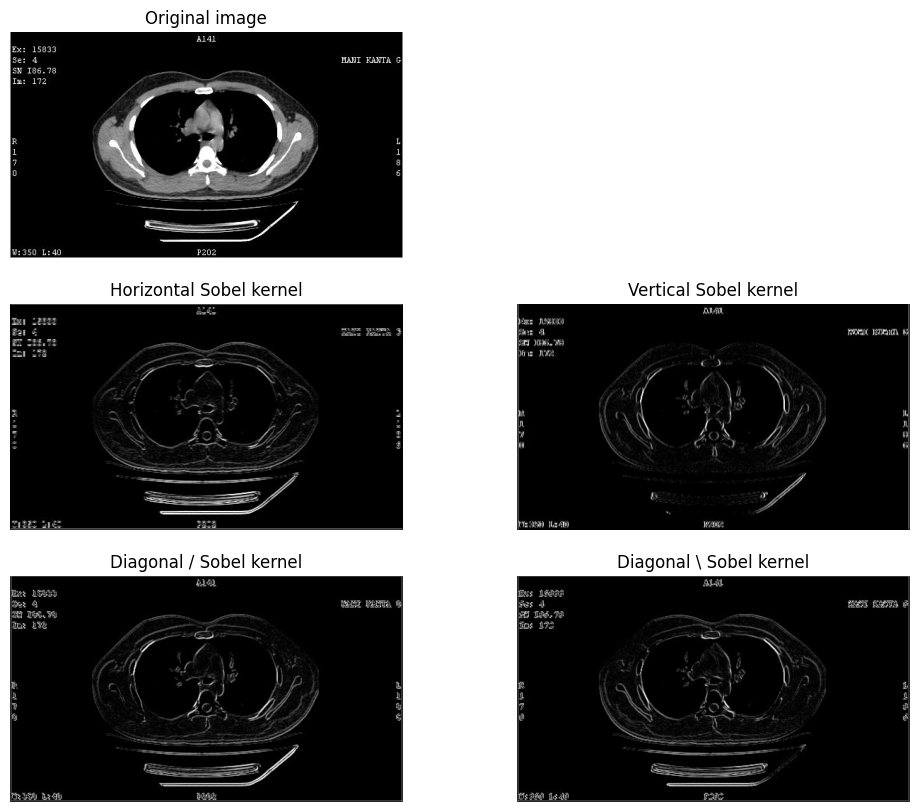

In [ ]:
# Load an image
image_path = '/content/drive/MyDrive/PIM/Images/CT_3-H.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert image to float32
image = image.astype(np.float32)

# Define the Sobel kernels
sobel_kernel_x = np.array([[-1, -2, -1],
                           [ 0,  0,  0],
                           [ 1,  2,  1]],
                           dtype=np.float32)  # Ensure the kernel is of type float32
sobel_kernel_y = np.array([[ -1,  0, 1],
                           [ -2,  0, 2],
                           [ -1,  0, 1]],
                           dtype=np.float32)
sobel_kernel_d1 = np.array([[-2, -1,  0],
                            [-1,  0,  1],
                            [ 0,  1,  2]],
                            dtype=np.float32)
sobel_kernel_d2 = np.array([[0, -1, -2],
                            [1,  0, -1],
                            [2,  1,  0]],
                            dtype=np.float32)

# Apply the Sobel kernels to the image
# Parameter -1 indicates to use the same bit depth as the input image
horizontal_edges = cv2.filter2D(image, -1, sobel_kernel_x)
vertical_edges = cv2.filter2D(image, -1, sobel_kernel_y)
diagonal1_edges = cv2.filter2D(image, -1, sobel_kernel_d1)
diagonal2_edges = cv2.filter2D(image, -1, sobel_kernel_d2)

# Normalize Sobel results to range [0, 255] before converting to uint8 for visualization
horizontal_edges_abs = np.uint8(cv2.normalize(np.absolute(horizontal_edges), None, 0, 255, cv2.NORM_MINMAX))
vertical_edges_abs = np.uint8(cv2.normalize(np.absolute(vertical_edges), None, 0, 255, cv2.NORM_MINMAX))
diagonal1_edges_abs = np.uint8(cv2.normalize(np.absolute(diagonal1_edges), None, 0, 255, cv2.NORM_MINMAX))
diagonal2_edges_abs = np.uint8(cv2.normalize(np.absolute(diagonal2_edges), None, 0, 255, cv2.NORM_MINMAX))

# Optionally, display the results
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title("Horizontal Sobel kernel")
plt.imshow(horizontal_edges_abs, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title("Vertical Sobel kernel")
plt.imshow(vertical_edges_abs, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(3, 2, 5)
plt.title("Diagonal / Sobel kernel")
plt.imshow(diagonal1_edges_abs, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(3, 2, 6)
plt.title("Diagonal \ Sobel kernel")
plt.imshow(diagonal2_edges_abs, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()

OpenCV includes the function `cv2.Sobel` which apply the Sobel filters:

      cv2.Sobel(src, ddepth, dx, dy, ksize)

with parameters:

* `src`: input image,
* `ddepth`: depth of the output image (e.g., cv2.CV_64F),
* `dx`: order of the derivative in the x-direction,
* `dy`: order of the derivative in the y-direction,
* `ksize`: size of the Sobel kernel (must be 1, 3, 5, or 7).

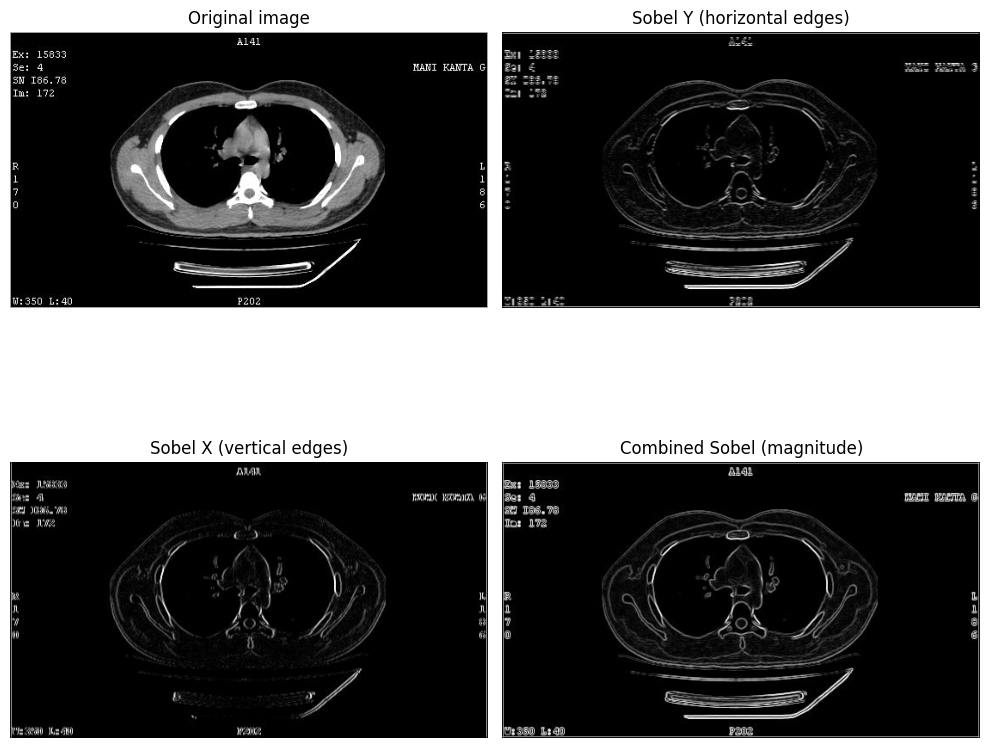

In [ ]:
# Load the image in grayscale
image_path = '/content/drive/MyDrive/PIM/Images/CT_3-H.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Sobel filter in y-direction (detects horizontal edges)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # dx = 0, dy = 1

# Apply Sobel filter in x-direction (detects vertical edges)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # dx = 1, dy = 0

# Normalize Sobel results to range [0, 255] before converting to uint8 for visualization
sobel_x_abs = np.uint8(cv2.normalize(np.absolute(sobel_x), None, 0, 255, cv2.NORM_MINMAX))
sobel_y_abs = np.uint8(cv2.normalize(np.absolute(sobel_y), None, 0, 255, cv2.NORM_MINMAX))

# Combine Sobel X and Sobel Y using the magnitude of gradients
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Normalize combined result before converting to uint8 for visualization
sobel_combined_uint8 = np.uint8(cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX))

# Display the original image, Sobel X, Sobel Y, and the combined result
plt.figure(figsize=(10, 10))

# Display the original image
plt.subplot(2, 2, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Display Sobel Y (horizontal edges)
plt.subplot(2, 2, 2)
plt.title("Sobel Y (horizontal edges)")
plt.imshow(sobel_y_abs, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Display Sobel X (vertical edges)
plt.subplot(2, 2, 3)
plt.title("Sobel X (vertical edges)")
plt.imshow(sobel_x_abs, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Display the combined Sobel (magnitude of Sobel X and Y)
plt.subplot(2, 2, 4)
plt.title("Combined Sobel (magnitude)")
plt.imshow(sobel_combined_uint8, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.tight_layout()
plt.show()

#### **Prewitt filter**

Another spatial filter that uses derivatives to detect edges is the Prewitt filter, defined with the following kernels:

$$
\begin{array}{|c|c|c|}
\hline
-1 & -1 & -1 \\
\hline
0 & 0 & 0 \\
\hline
1 & 1 & 1 \\
\hline
\end{array}
\quad \quad \quad
\begin{array}{|c|c|c|}
\hline
-1 & 0 & 1 \\
\hline
-1 & 0 & 1 \\
\hline
-1 & 0 & 1 \\
\hline
\end{array}
$$
<p align="center">Figure 25: Prewitt masks for horizontal and vertical edges detection.</p>


$$
\begin{array}{|c|c|c|}
\hline
-1 & -1 & 0 \\
\hline
-1 & 0 & 1 \\
\hline
0 & 1 & 1 \\
\hline
\end{array}
\quad \quad \quad
\begin{array}{|c|c|c|}
\hline
0 & -1 & -1 \\
\hline
1 & 0 & -1 \\
\hline
1 & 1 & 0 \\
\hline
\end{array}
$$
<p align="center">Figure 26: Prewitt masks for diagonal edges detection.</p>

Similar to the Sobel filter, the **sum of coefficients** in the Prewitt filter is also **0**. However, unlike the Sobel filter, the Prewitt filter **does not reduce noise**.



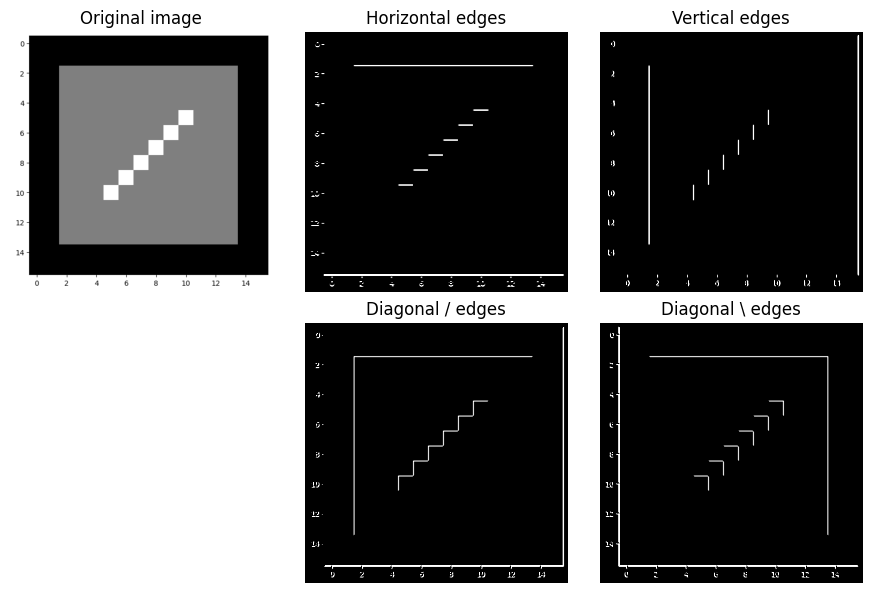

In [ ]:
# Load the image in grayscale
image_path = '/content/drive/MyDrive/PIM/Images/2D_image.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert image to float32
image = image.astype(np.float32)

# Define the Prewitt kernels
prewitt_kernel_x = np.array([[-1, -1, -1],
                             [ 0,  0,  0],
                             [ 1,  1,  1]], dtype=np.float32)

prewitt_kernel_y = np.array([[-1,  0,  1],
                             [-1,  0,  1],
                             [-1,  0,  1]], dtype=np.float32)

prewitt_kernel_d1 = np.array([[-1, -1,  0],
                              [-1,  0,  1],
                              [ 0,  1,  1]], dtype=np.float32)

prewitt_kernel_d2 = np.array([[ 0, -1, -1],
                              [ 1,  0, -1],
                              [ 1,  1,  0]], dtype=np.float32)

# Apply the Prewitt kernels to the image
horizontal_edges = cv2.filter2D(image, -1, prewitt_kernel_x)
vertical_edges = cv2.filter2D(image, -1, prewitt_kernel_y)
diagonal1_edges = cv2.filter2D(image, -1, prewitt_kernel_d1)
diagonal2_edges = cv2.filter2D(image, -1, prewitt_kernel_d2)

# Display the results
plt.figure(figsize=(9, 6))

plt.subplot(2, 3, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Horizontal edges")
plt.imshow(horizontal_edges, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Vertical edges")
plt.imshow(vertical_edges, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Diagonal / edges")
plt.imshow(diagonal1_edges, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title("Diagonal \ edges")
plt.imshow(diagonal2_edges, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.tight_layout()
plt.show()

#### **Scharr filter**

A third spatial filter that uses derivatives to **detect edges** is the Scharr filter, which is an **optimized version of the Sobel filter**, providing **better accuracy** for edge detection, especially when using small kernels (3x3) for **finer details and small features**.

The Scharr filter is defined with the following kernels:

$$
\begin{array}{|c|c|c|}
\hline
3 & 10 & 3 \\
\hline
0 & 0 & 0 \\
\hline
-3 & -10 & -3 \\
\hline
\end{array}
\quad \quad \quad
\begin{array}{|c|c|c|}
\hline
3 & 0 & -3 \\
\hline
10 & 0 & -10 \\
\hline
3 & 0 & -3 \\
\hline
\end{array}
$$
<p align="center">Figure 27: Scharr masks for horizontal and vertical edges detection.</p>

The Scharr filter is designed to **emphasize stronger gradients**, leading to **sharper and more accurate edge detection**, especially when used for detecting subtle details in images.

Like the Sobel and Prewitt filters, the Scharr filter also has a **sum of coefficients equal to 0**, ensuring edge detection by highlighting intensity changes.

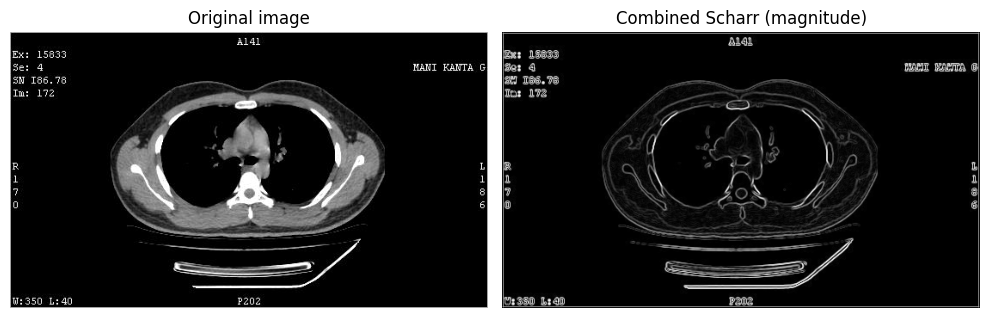

In [ ]:
# Load the image in grayscale
image_path = '/content/drive/MyDrive/PIM/Images/CT_3-H.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Scharr filter in y-direction (detects horizontal edges)
scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)  # dx = 0, dy = 1

# Apply Scharr filter in x-direction (detects vertical edges)
scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)  # dx = 1, dy = 0

# Normalize Scharr results to range [0, 255] before converting to uint8 for visualization
scharr_y_abs = np.uint8(cv2.normalize(np.absolute(scharr_y), None, 0, 255, cv2.NORM_MINMAX))
scharr_x_abs = np.uint8(cv2.normalize(np.absolute(scharr_x), None, 0, 255, cv2.NORM_MINMAX))

# Combine Scharr X and Scharr Y using the magnitude of gradients
scharr_combined = cv2.magnitude(scharr_x, scharr_y)

# Normalize the combined result before converting to uint8 for visualization
scharr_combined_uint8 = np.uint8(cv2.normalize(scharr_combined, None, 0, 255, cv2.NORM_MINMAX))

# Display the original image, Scharr X, Scharr Y, and the combined result
plt.figure(figsize=(10, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Display the combined Scharr (magnitude of Scharr X and Y)
plt.subplot(1, 2, 2)
plt.title("Combined Scharr (magnitude)")
plt.imshow(scharr_combined_uint8, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.tight_layout()
plt.show()

### 6.2. Second Derivative Filters

Second derivative filters **highlight areas where the intensity gradient changes sharply**, which often corresponds to **edges or boundaries** in an image.

These filters compute the derivative of a derivative image, so they are **computationally more expensive** than first derivative filters.

Because of the nature of the second derivative, these filters **exhibit zero-crossings at points where the gradient changes direction**, which is exploited to identify the **location of edges**.

The **applications** of these filters are mainly:

*	**Edge detection**, for images where first derivative filters don't perform well.

*	**Blob detection**, identifying regions in the image that differ in properties (brightness, color, ...) compared to surrounding areas.

#### **Laplacian**

This second-order derivative filter is **rotation invariant (isotropic)**. It computes the second derivatives of the image in **both horizontal and vertical directions and sums them**.

The Laplacian operator of an image $f(x,y)$ is defined as:

$$\nabla^2 f(x,y) = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$

Since $\dfrac{\partial f}{\partial x} \approx f(x+1)-f(x)$ for discrete signals, then:

$$\frac{\partial^2 f}{\partial x^2} \approx f(x+1)-f(x)-(f(x)-f(x-1))=f(x+1)+f(x-1)-2f(x)$$

Similarly, for the $y$ direction:

$$\frac{\partial^2 f}{\partial y^2} \approx f(y+1)-f(y)-(f(y)-f(y-1))=f(y+1)+f(y-1)-2f(y)$$

Summing both results, it yields:

$$\nabla^2 f(x,y) \approx f(x+1,y)+f(x-1,y)+f(x,y+1)+f(x,y-1)-4f(x,y)$$

which results in the following kernels for 4 and 8 nearest pixels:

$$
\begin{array}{|c|c|c|}
\hline
0 & 1 & 0 \\
\hline
1 & -4 & 1 \\
\hline
0 & 1 & 0 \\
\hline
\end{array}
\quad \text{and} \quad
\begin{array}{|c|c|c|}
\hline
1 & 1 & 1 \\
\hline
1 & -8 & 1 \\
\hline
1 & 1 & 1 \\
\hline
\end{array}
$$
<p align="center">Figure 28: 3-by-3 kernels for the Laplacian filter.</p>

As usual in derivative filters, the **sum of all kernel coefficients is 0**, which means that the Laplacian filter **removes the average intensity in smooth areas** (eliminates the DC component).

One of the effects of the second derivative filters is to **add noise** to the resulting image. Depending on the image, the Laplacian filter **may create artificial edges**, which results in a **noisy image**.

So, **before** applying a second derivative filter, it is usual to apply a **smoothing filter**, such as a Gaussian blur, to **reduce the noise**.

This preprocessing step helps in **preventing the amplification of high-frequency noise** and ensures that the Laplacian filter primarily enhances actual edges rather than random noise.

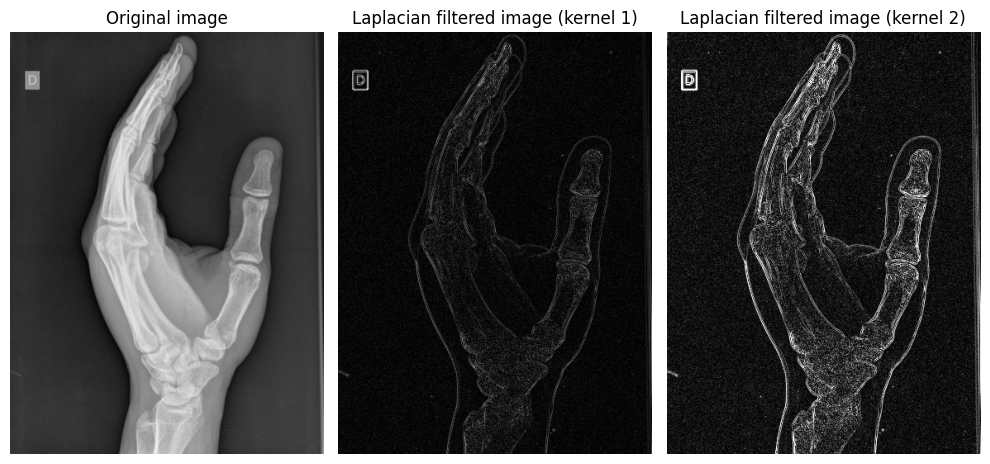

In [ ]:
# Load the image in grayscale
#image_path = '/content/drive/MyDrive/PIM/Images/CT_slice_0108.png'
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_3.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the Laplacian kernel (3x3)
laplacian_kernel_1 = np.array([[0,  1,  0],
                               [1, -4,  1],
                               [0,  1,  0]], dtype=np.float32)

laplacian_kernel_2 = np.array([[1,  1,  1],
                               [1, -8,  1],
                               [1,  1,  1]], dtype=np.float32)

# Apply the Laplacian kernel using filter2D
laplacian_1 = cv2.filter2D(image, cv2.CV_64F, laplacian_kernel_1)
laplacian_2 = cv2.filter2D(image, cv2.CV_64F, laplacian_kernel_2)

# Convert the result back to uint8 for proper visualization
laplacian_1 = cv2.convertScaleAbs(laplacian_1, alpha=2.0)
laplacian_2 = cv2.convertScaleAbs(laplacian_2, alpha=2.0)

# Plot the original image and the Laplacian result
plt.figure(figsize=(10, 6))

# Display the original image
plt.subplot(1, 3, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Display the Laplacian filtered image (kernel 1)
plt.subplot(1, 3, 2)
plt.title("Laplacian filtered image (kernel 1)")
plt.imshow(laplacian_1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Display the Laplacian filtered image (kernel 2)
plt.subplot(1, 3, 3)
plt.title("Laplacian filtered image (kernel 2)")
plt.imshow(laplacian_2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.tight_layout()
plt.show()

OpenCV uses two functions to calculate the Laplacian of an image and visualize the results:

* `cv2.Laplacian(src, ddepth, ksize)`: computes the Laplacian of an image.

  * `src`: input image (grayscale),
  * `ddepth`: desired depth of the output image (e.g., cv2.CV_64F for 64-bit floating point),
  * `ksize` (optional): kernel size for computing the Laplacian. It is 1 by default, but larger odd values like 3 or 5 can be used for smoother results.

* `cv2.convertScaleAbs(src, alpha, beta)`:

  After applying the Laplacian, the result may contain **negative values and floating-point numbers**. Since images need to have values in the range [0, 255] to be properly displayed, cv2.convertScaleAbs() is used to:

    * Take the **absolute value** of the input (to remove negative values),
    * Optionally **scale** the result.
    * Convert it to an 8-bit **unsigned integer** (uint8) suitable for display.

  Parameters:
    * `src`: input image (the Laplacian result),
    * `alpha` (optional): scaling factor for the image intensity (it is 1 by default).
    * `beta` (optional): optional offset added to the scaled values (0 by default).

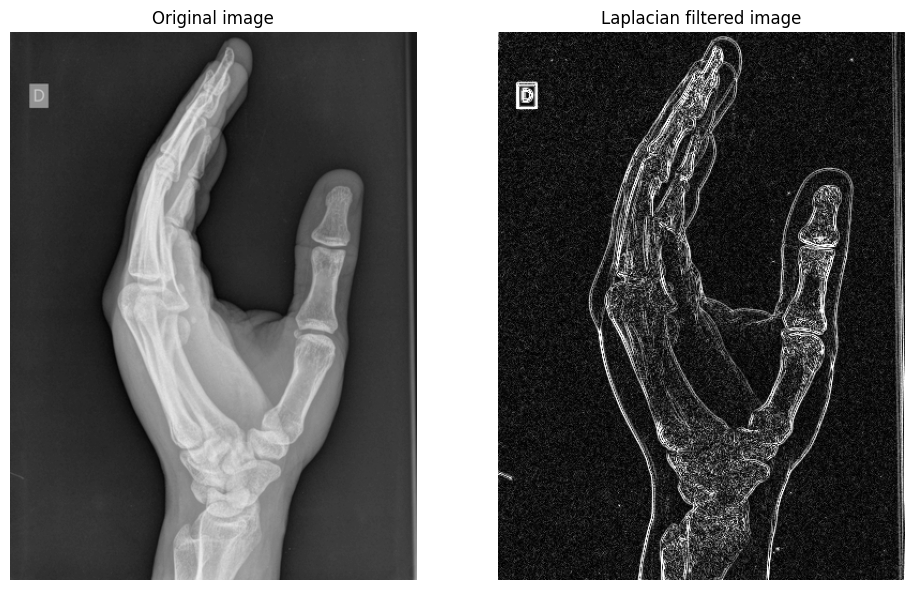

In [ ]:
# Load the image in grayscale
#image_path = '/content/drive/MyDrive/PIM/Images/2D_image.png'
#image_path = '/content/drive/MyDrive/PIM/Images/DICOM_file_2.png'
#image_path = '/content/drive/MyDrive/PIM/Images/CT_slice_0016.png'
#image_path = '/content/drive/MyDrive/PIM/Images/CT_slice_0108.png'
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_3.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply the Laplacian filter
laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=3)
# Convert the Laplacian back to uint8 for proper visualization
laplacian = cv2.convertScaleAbs(laplacian, alpha=2.0)

# Plot the original image and the Laplacian result
plt.figure(figsize=(10, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Display the Laplacian filtered image
plt.subplot(1, 2, 2)
plt.title("Laplacian filtered image")
plt.imshow(laplacian, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.tight_layout()
plt.show()

#### **Laplacian of Gaussian**

The Laplacian of Gaussian (LoG) kernel is a combination of two image processing techniques:

* **Gaussian smoothing** to reduce noise in the image.
* **Laplacian operator** to detect edges by finding areas of rapid intensity change using the second derivative (zero-crossing points).

The Laplacian of Gaussian operator first applies a Gaussian blur to smooth the image and **reduce noise**, then applies the Laplacian operator to **detect edges**. The overall effect is  **better noise robustness in detecting edges**.

The mathematical expression for the Laplacian of Gaussian in 2D is:

$$
LoG(x, y) = \nabla^2G(x, y) = - \dfrac{1}{\pi \sigma^4} \left( 1 - \frac{x^2 + y^2}{2\sigma^2} \right) \cdot \exp\left( -\frac{x^2 + y^2}{2\sigma^2} \right)
$$

<img src="https://www.researchgate.net/publication/312264140/figure/fig3/AS:579120674164741@1515084536944/a-Laplacian-of-Gaussian-as-a-kernel-in-3-D-view-and-b-thresholded-blob-image-The.png" alt="Caption" width="400">
<p style="text-align: center;">Figure 29: Laplacian of Gaussian function. Source: <a href="https://www.researchgate.net/figure/a-Laplacian-of-Gaussian-as-a-kernel-in-3-D-view-and-b-thresholded-blob-image-The_fig3_312264140">ResearchGate.</a></p>

The Laplacian of Gaussian kernel is more complex than a standard Laplacian kernel because it incorporates the Gaussian smoothing step, so the kernel is often larger than 3-by-3 size:

$$
\begin{array}{|c|c|c|c|c|}
\hline
0 & 0 & -1 & 0 & 0 \\
\hline
0 & -1 & -2 & -1 & 0 \\
\hline
-1 & -2 & 16 & -2 & -1 \\
\hline
0 & -1 & -2 & -1 & 0 \\
\hline
0 & 0 & -1 & 0 & 0 \\
\hline
\end{array}
$$
<p align="center">Figure 30: 5-by-5 kernel for the LoG filter.</p>

Alternatively, the functions `cv2.GaussianBlur`, `cv2.Laplacian`, and `cv2.convertScaleAbs` can also be used.

Although the LoG filter may **improve the results** with respect to the Laplacian filter, due to the Gaussian smoothing, it still results usually in **noisy images**.

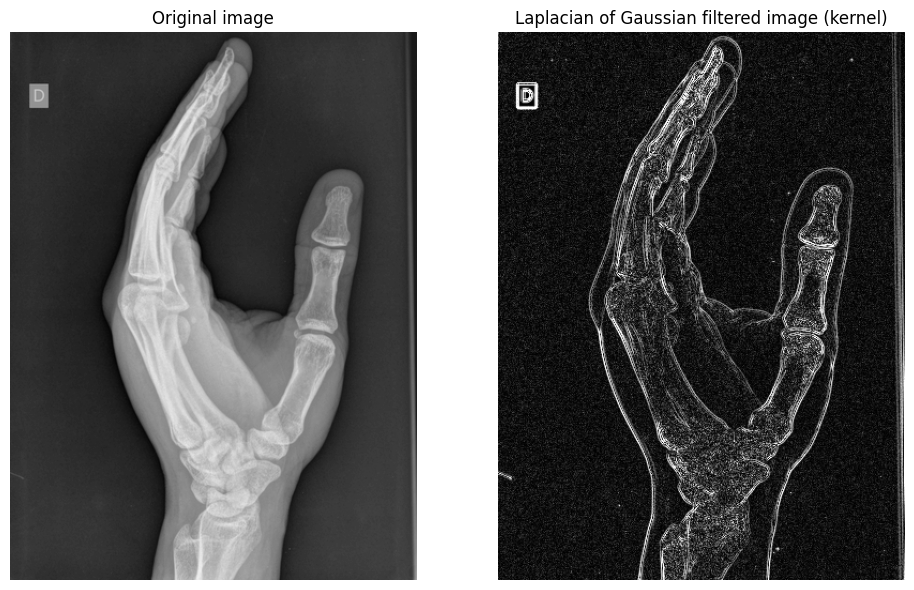

In [ ]:
# Load the image in grayscale
#image_path = '/content/drive/MyDrive/PIM/Images/CT_slice_0016.png'
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_3.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert image to float32
image = image.astype(np.float32)

# Define the Laplacian of Gaussian (LoG) kernel
LoG_kernel = np.array([[ 0,  0, -1,  0,  0],
                       [ 0, -1, -2, -1,  0],
                       [-1, -2, 16, -2, -1],
                       [ 0, -1, -2, -1,  0],
                       [ 0,  0, -1,  0,  0]], dtype=np.float32)

# Apply the kernel to the image
LoG_image = cv2.filter2D(image, -1, LoG_kernel)

# Scale the result and convert it to uint8 for visualization
LoG_image_uint8 = cv2.convertScaleAbs(LoG_image, alpha=1.0)

# Plot the original image and the Laplacian of Gaussian result
plt.figure(figsize=(10, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Display the Laplacian of Gaussian filtered image
plt.subplot(1, 2, 2)
plt.title("Laplacian of Gaussian filtered image (kernel)")
plt.imshow(LoG_image_uint8, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.tight_layout()
plt.show()

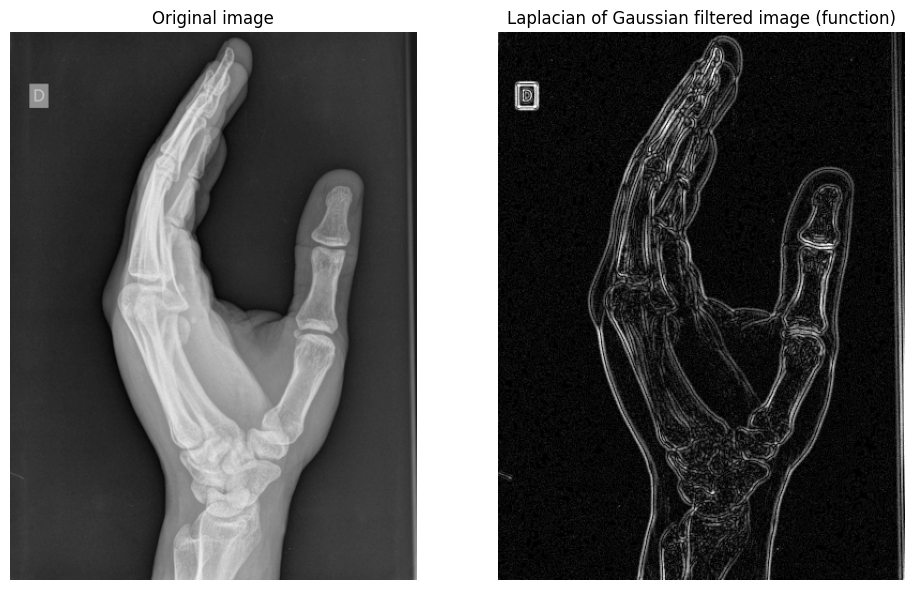

In [ ]:
# Load the image in grayscale
#image_path = '/content/drive/MyDrive/PIM/Images/2D_image.png'
#image_path = '/content/drive/MyDrive/PIM/Images/DICOM_file_2.png'
#image_path = '/content/drive/MyDrive/PIM/Images/CT_slice_0016.png'
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_3.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Apply Gaussian blur to reduce noise before applying Laplacian
blurred_image = cv2.GaussianBlur(image, (5, 5), sigmaX=1.0)

# Step 2: Apply the Laplacian filter to the blurred image
laplacian_of_gaussian = cv2.Laplacian(blurred_image, cv2.CV_64F, ksize=3)

# Convert the Laplacian result back to uint8 for proper visualization
laplacian_of_gaussian = cv2.convertScaleAbs(laplacian_of_gaussian, alpha=3.0)

# Plot the original image and the Laplacian of Gaussian result
plt.figure(figsize=(10, 6))

# Display the original image
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Display the Laplacian of Gaussian filtered image
plt.subplot(1, 2, 2)
plt.title("Laplacian of Gaussian filtered image (function)")
plt.imshow(laplacian_of_gaussian, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.tight_layout()
plt.show()

#### **Difference of Gaussians**

The Difference of Gaussians (DoG) is an **edge detection** technique used in image processing that **approximates the Laplacian of Gaussian** (LoG)[4] by **subtracting two Gaussian-blurred** versions of an image, each with a different standard deviation ($\sigma$).

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*EQLp2_CWFSOTPBrwObNDkg.png" alt="Caption" width="800">
<p style="text-align: center;">Figure 31: Difference of Gaussians filtering applied to an image. Source: <a href="https://medium.com/jun94-devpblog/cv-3-gradient-and-laplacian-filter-difference-of-gaussians-dog-7c22e4a9d6cc">Medium.com.</a></p>

It is **not** directly **a second derivative filter**, but it serves a **similar purpose** by highlighting regions in the image where there are rapid intensity changes, which correspond to edges.

The DoG algorithm consists of two steps:

1. **Smoothing with Gaussian blur**: the image is **smoothed twice** using two different Gaussian kernels with different standard deviations ($\sigma_1$ and $\sigma_2$). This step **reduces noise and fine details**.
2. **Subtraction**: the two blurred images are **subtracted** from each other to **emphasize** regions where there are significant **intensity changes between the scales** of the two Gaussian blurs.

This **subtraction** process **approximates the second derivative** of the image, which makes DoG useful for detecting edges and other high-frequency components in the image.

In addition, compared to directly computing the Laplacian, DoG is **computationally efficient** since it involves simple Gaussian smoothing and subtraction.

[4]: https://dsp.stackexchange.com/questions/37673/what-is-the-difference-between-difference-of-gaussian-laplace-of-gaussian-and

<img src="https://i.sstatic.net/OP0aF.png" alt="Caption" width="600">
<p style="text-align: center;">Figure 32: LoG function and its approximation with the DoG function. Source: <a href="https://dsp.stackexchange.com/questions/37673/what-is-the-difference-between-difference-of-gaussian-laplace-of-gaussian-and">dsp.stackexchange.com.</a></p>

The Difference of Gaussians can be expressed as:

$$
DoG(x, y, \sigma_1, \sigma_2) = G_{\sigma_1}(x,y) - G_{\sigma_2}(x,y) = G(x, y, \sigma_1) * I(x, y) - G(x, y, \sigma_2) * I(x, y) \approx \nabla^2G(x, y) = LoG(x, y)
$$

where:

* $I(x, y)$ is the original image at coordinates $(x, y)$,
* $G(x, y, \sigma)$ is the Gaussian function with standard deviation $\sigma$, defined as:

$$G(x, y, \sigma) = \frac{1}{2\pi\sigma^2} \cdot \exp\left({-\frac{x^2 + y^2}{2\sigma^2}}\right)$$

* $\ast$ denotes convolution,
* $\sigma_1$ and $\sigma_2$ are the two different standard deviations used for smoothing the image, where $\sigma_1 < \sigma_2$.

For more flexibility, **kernel sizes can also be different**, with larger kernel size for the Gaussian with larger $\sigma$.

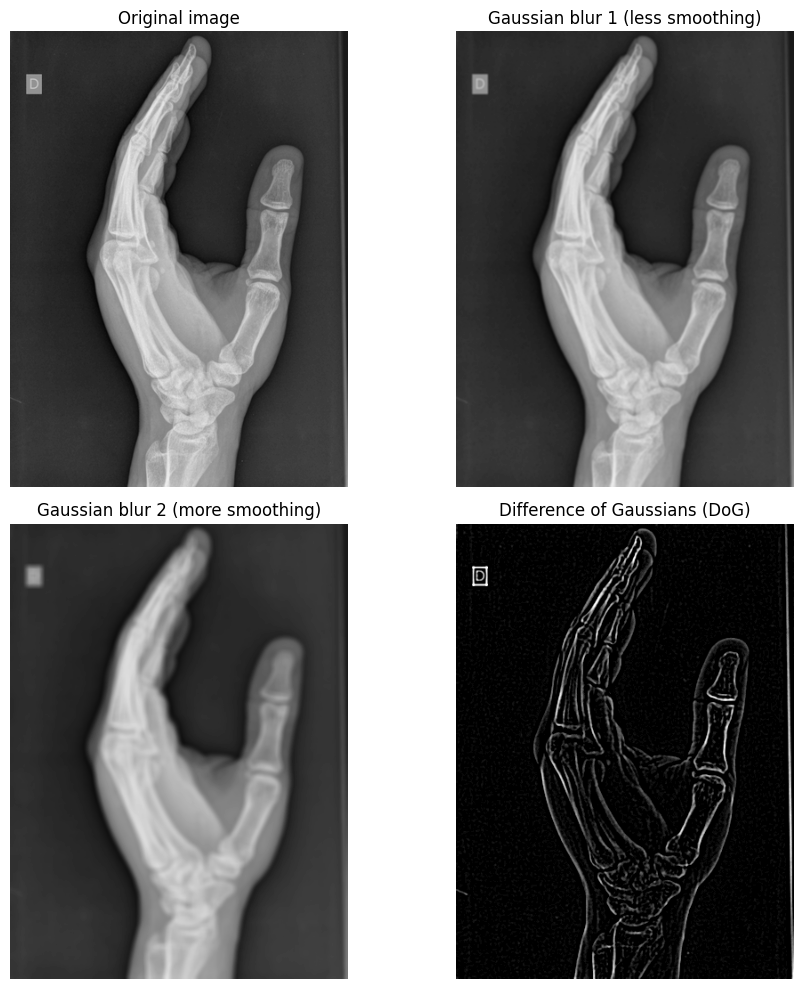

In [ ]:
# Load the image in grayscale
#image_path = '/content/drive/MyDrive/PIM/Images/2D_image.png'
#image_path = '/content/drive/MyDrive/PIM/Images/DICOM_file_2.png'
#image_path = '/content/drive/MyDrive/PIM/Images/CT_slice_0016.png'
image_path = '/content/drive/MyDrive/PIM/Images/X-ray_3.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Apply two Gaussian blurs with different sigma values
# First Gaussian blur (smaller sigma and kernel size for less smoothing)
gaussian_blur_1 = cv2.GaussianBlur(image, (3, 3), sigmaX=1.0)

# Second Gaussian blur (larger sigma and kernel size for more smoothing)
gaussian_blur_2 = cv2.GaussianBlur(image, (7, 7), sigmaX=5.0)

# Step 2: Compute the Difference of Gaussians (DoG)
difference_of_gaussians = cv2.subtract(gaussian_blur_1, gaussian_blur_2)

# Convert the DoG result to uint8 for proper visualization and scale (with alpha)
difference_of_gaussians = cv2.convertScaleAbs(difference_of_gaussians, alpha=10.0)

# Plot the original image, the two Gaussian-blurred images, and the DoG result
plt.figure(figsize=(10, 10))

# Display the original image
plt.subplot(2, 2, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Display the first Gaussian-blurred image
plt.subplot(2, 2, 2)
plt.title("Gaussian blur 1 (less smoothing)")
plt.imshow(gaussian_blur_1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Display the second Gaussian-blurred image
plt.subplot(2, 2, 3)
plt.title("Gaussian blur 2 (more smoothing)")
plt.imshow(gaussian_blur_2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

# Display the Difference of Gaussians filtered image
plt.subplot(2, 2, 4)
plt.title("Difference of Gaussians (DoG)")
plt.imshow(difference_of_gaussians, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.tight_layout()
plt.show()

## References

* González, Rafael C., _Digital image processing: Chapter 3 (Intensity Transformations and Spatial Filtering)_. Prentice Hall,. 2018. 9780132345637

* Chityala, Ravishankar, _Image Processing and Acquisition Using Python: Chapter 4 (Spatial Filters)_. Chapman and Hall/CRC, 2022. 9780367531577

* Birkfellner, Wolfgang, _Applied Medical Image Processing - A Basic Course: Chapter 5 (Filtering and Transformations)_. CRC Press, 2014. 9781466555570

* Fernández Villán, Alberto, _Mastering OpenCV 4 with Python: Chapter 5 (Image Processing Techniques)_. Packt. 2019. 9781789344912

